***SUDAN CIVIL WAR 2023***

## Importing Python Libraries

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn import preprocessing # Import label encoder 
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.set_option('display.max_columns', 100) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
print(pd.__version__)

2.1.0


In [3]:
print(np.__version__)

1.24.4


In [4]:
import warnings
warnings.filterwarnings("ignore")

## Loading multiple csv of FIRMS data from Google Earth Engine

In [17]:
#New Data added - Year 2000-2001
firms_data00 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2000_2001_.csv", encoding = "latin1")

In [18]:
#Year 2002-2003
firms_data01 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2002_2003.csv", encoding = "latin1")

In [19]:
##Year 2004-2006
firms_data1 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2004_2006.csv", encoding = "latin1")

In [20]:
firms_data00.grid_id.nunique()

850

In [21]:
firms_data00.shape

(1700, 5)

In [22]:
firms_data2= pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2007_2008.csv", encoding = "latin1")

In [23]:
firms_data2.grid_id.nunique()

850

## Loading more CSV files -FIRMS DATA

In [24]:
firms_data3 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2009_2010.csv", encoding = "latin1")

In [25]:
firms_data4 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2011_2012.csv", encoding = "latin1")

In [26]:
firms_data5 = pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2013_2014_.csv", encoding = "latin1")

In [27]:
firms_data6= pd.read_csv("data/Sudan_Fire_Year_2015_2016.csv", encoding = "latin1")

In [28]:
firms_data7= pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2017_2018.csv",encoding = "latin1") 

In [29]:
firms_data8=pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2019_2020_.csv",encoding = "latin1")

In [30]:
firms_data9= pd.read_csv("data/Sudan_Fire_Year_2021_2022.csv",encoding = "latin1")

In [31]:
firms_data9

,system:index,fireCount,grid_id,year,.geo
0,0,1,"52,19","2,021.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,1,"52,19","2,022.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,2,"53,19","2,021.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,2,"53,19","2,022.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,1,"54,19","2,021.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
1695,1695,0,"80,49","2,022.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1696,1696,0,"81,49","2,021.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1697,1697,0,"81,49","2,022.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1698,1698,0,"82,49","2,021.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [32]:
#Adding Year 2023 but taking out Year 2024
firms_data10= pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2022_2023_.csv",encoding = "latin1")

In [33]:
# Drop rows where year is 2022
firms_data101 =firms_data10[firms_data10['year'] != 2022]

In [34]:
firms_data101

,system:index,fireCount,grid_id,year,.geo
1,1,4,"52,19","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,6,"53,19","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
5,5,5,"54,19","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
7,7,6,"52,20","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
9,9,4,"53,20","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
1691,1691,0,"70,49","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1693,1693,0,"79,49","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1695,1695,0,"80,49","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1697,1697,0,"81,49","2,023.0000","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [35]:
#firms_data10= pd.read_csv("data/Sudan_Fire_Counts_Grid_Year_2023_2024_latest.csv",encoding = "latin1")

## Merging FIRMS fire Data from 2000-2023

In [36]:
firms_2000_2023 = pd.concat([firms_data00, firms_data01, firms_data1, firms_data2, firms_data3,
                             firms_data4, firms_data5, firms_data6, firms_data7, firms_data8, firms_data9,
                             firms_data101])                        
                             

In [37]:
#firms_data_merged_2009_2024 = pd.concat([firms_data3, firms_data4, firms_data5, firms_data6, firms_data7, firms_data8, firms_data9, firms_data10], ignore_index=True)

In [38]:
#final_merge_fire_data_2004_2024= pd.concat([merged_data,firms_data_merged_2009_2024] ,ignore_index=True)

In [39]:
#FIRMS fire data from year 2004-2024
#final_merge_fire_data_2004_2024

In [40]:
firms_2000_2023.year.unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021., 2022., 2023.])

In [41]:
firms_2000_2023.shape

(20400, 5)

**The final FIRMS data from the Year 2000 to 2023 has 20400 rows and 5 columns**

In [42]:
firms_2000_2023.describe(include='all')

,system:index,fireCount,grid_id,year,.geo
count,"20,400.0000","20,400.0000",20400,"20,400.0000",20400
unique,NaN,NaN,850,NaN,850
top,NaN,NaN,"52,19",NaN,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
freq,NaN,NaN,24,NaN,24
mean,902.6458,3.3183,NaN,"2,011.5000",NaN
std,546.1060,6.3263,NaN,6.9224,NaN
min,0.0000,0.0000,NaN,"2,000.0000",NaN
25%,443.0000,0.0000,NaN,"2,005.7500",NaN
50%,886.5000,0.0000,NaN,"2,011.5000",NaN
75%,"1,330.0000",4.0000,NaN,"2,017.2500",NaN


In [43]:
firms_2000_2023['fireCount'].describe()

count                                20,400.0000
mean                                      3.3183
std                                       6.3263
min                                       0.0000
25%                                       0.0000
50%                                       0.0000
75%                                       4.0000
max                                      44.0000
Name: fireCount, dtype: float64

In [44]:
firms_2000_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20400 entries, 0 to 1699
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  20400 non-null  int64  
 1   fireCount     20400 non-null  int64  
 2   grid_id       20400 non-null  object 
 3   year          20400 non-null  float64
 4   .geo          20400 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 956.2+ KB


**The YEAR column is float datatype so converting it to integer.**

In [45]:
# Changing the Year column to int
firms_2000_2023['year'] = firms_2000_2023['year'].astype(int)

In [46]:
firms_2000_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20400 entries, 0 to 1699
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system:index  20400 non-null  int64 
 1   fireCount     20400 non-null  int64 
 2   grid_id       20400 non-null  object
 3   year          20400 non-null  int64 
 4   .geo          20400 non-null  object
dtypes: int64(3), object(2)
memory usage: 956.2+ KB


In [47]:
firms_2000_2023

,system:index,fireCount,grid_id,year,.geo
0,0,18,"52,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,4,"52,19",2001,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,18,"53,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,13,"53,19",2001,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,14,"54,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
1691,1691,0,"70,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1693,1693,0,"79,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1695,1695,0,"80,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1697,1697,0,"81,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [48]:
firms_2000_2023.dtypes

system:index     int64
fireCount        int64
grid_id         object
year             int64
.geo            object
dtype: object

In [49]:
firms_2000_2023= firms_2000_2023.drop(columns=['system:index'])	

In [50]:
firms_2000_2023

,fireCount,grid_id,year,.geo
0,18,"52,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,4,"52,19",2001,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,18,"53,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,13,"53,19",2001,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,14,"54,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...
1691,0,"70,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1693,0,"79,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1695,0,"80,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1697,0,"81,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


**Checking for Null Values in the fire data**

In [55]:
firms_2000_2023.isnull().sum(axis=0).sort_values(ascending=False)[:12]

fireCount    0
grid_id      0
year         0
.geo         0
dtype: int64

In [56]:
yearly_fireCount_sum = firms_2000_2023[['year', 'fireCount']].groupby('year').sum()

In [57]:
yearly_fireCount_sum

,fireCount
year,
2000,2660
2001,3619
2002,2722
2003,2791
2004,2740
2005,2331
2006,2600
2007,2841
2008,3044


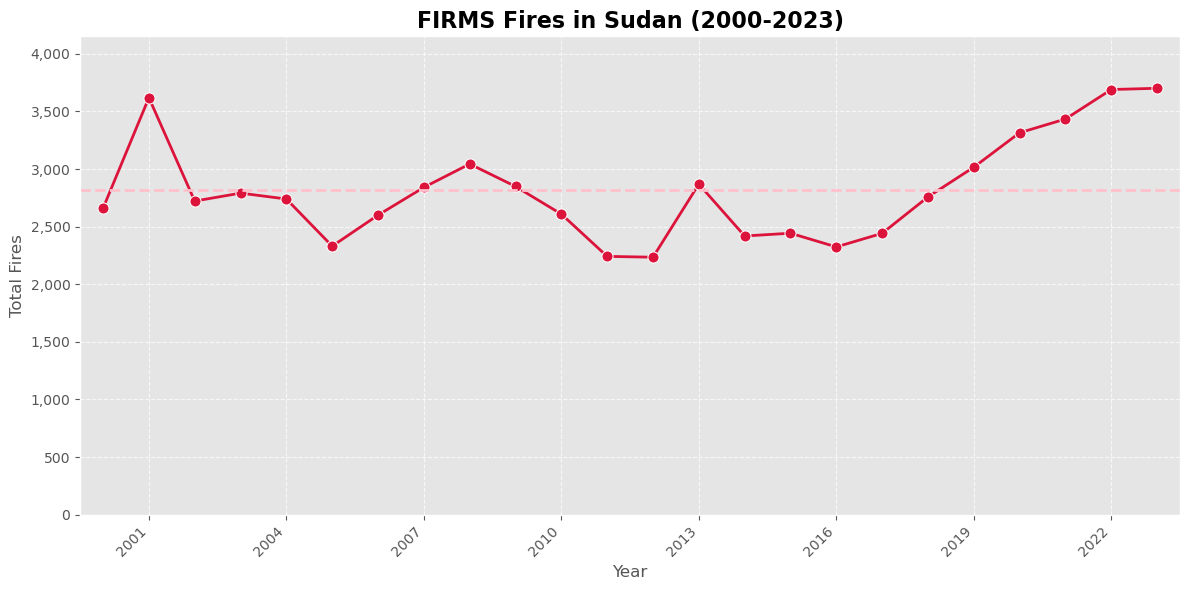

In [58]:
average_fireCount = yearly_fireCount_sum['fireCount'].mean()

plt.figure(figsize=(12, 6))

# Create the line plot with a red-orange color
#sns.lineplot(data=firms_2000_2023, x='year', y='fireCount', marker='o', color='#DC143C', linewidth=2, markersize=8)
sns.lineplot(data=yearly_fireCount_sum, x='year', y='fireCount', marker='o', color='#DC143C', linewidth=2, markersize=8)

# Add a horizontal line representing the average fire count
plt.axhline(y=average_fireCount, color='pink', linestyle='--', linewidth=2, label=f'Average Fire Count: {average_fireCount:.2f}')

# Customize the plot
plt.title('FIRMS Fires in Sudan (2000-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Fires', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis
years = firms_2000_2023['year'].unique()
plt.xticks(years, rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add space to x-axis
plt.xlim(min(years) - 0.5, max(years) + 0.5)

# Improve y-axis
plt.ylim(0, plt.ylim()[1] * 1.1)  # Add 10% space above the highest point

# Add thousands separator to y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('FIRMS_Fire_Count_2000_2023_new.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

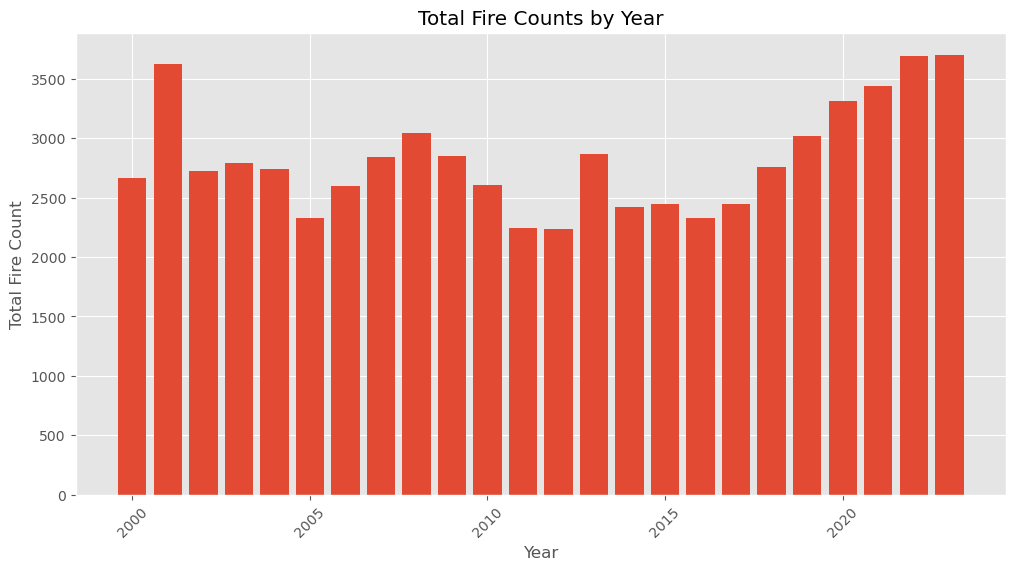

In [59]:
# Aggregate fire counts by year
yearly_fire_counts = firms_2000_2023.groupby('year')['fireCount'].sum().reset_index()

# Create a histogram
#plt.figure(figsize=(12, 6))
#plt.hist( firms_2000_2023['fireCount'], bins=50, edgecolor='black')
#plt.title('Histogram of Fire Counts')
#plt.xlabel('Fire Count')
#plt.ylabel('Frequency')
#plt.show()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(yearly_fire_counts['year'], yearly_fire_counts['fireCount'])
plt.title('Total Fire Counts by Year')
plt.xlabel('Year')
plt.ylabel('Total Fire Count')
plt.xticks(rotation=45)
plt.show()

In [60]:
# # Save to a new CSV file
# final_merge_fire_data_2004_2024.to_csv('FIRMS_FIRE_DATA_2004_24.csv', index=False)

In [61]:
# Save to a new CSV file
firms_2000_2023.to_csv('firms_2000_2023_new.csv', index=False)

In [62]:
#plt.figure(figsize=(10, 6))
#sns.lineplot(data=firms_2000_2023, x='year', y='fireCount', marker='o')

# Customize the plot
#plt.title('Fire Counts over Years')
#plt.xlabel('Year')
#plt.ylabel('Fire Count')
#plt.grid(True)
#plt.xticks(firms_2000_2023['year'].unique())
# Save the plot
#plt.savefig('FIRMS_Fire_counts_2000_23.png', dpi=300)

# Show the plot
#plt.show()

# Reading ACLED DATA

**Year 2004-2024**

In [63]:
acled_data_2004_2024 = pd.read_csv("data/2004-01-01-2024-06-30-Sudan.csv", encoding = "latin1")

In [64]:
acled_data_2004_2024.shape

(45980, 29)

In [65]:
acled_data_2004_2024[acled_data_2004_2024['year'] != 2024].shape

(40141, 29)

**Point to notice that data for the year2024 was available for 6 months so we are not including it but the ACLED event in that year is **5839** for month of January to June.**

**Reading the acled data from 2000-2023**

In [66]:
acled_2000_23 = pd.read_csv("data/2000-01-01-2023-12-31-Sudan.csv", encoding = "latin1")

In [67]:
acled_2000_23.shape

(42156, 32)

**So the ACLED data has 42156 rows and 32 Columns**

In [68]:
acled_2000_23.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'tags', 'timestamp', 'population_1km',
       'population_2km', 'population_5km', 'population_best'],
      dtype='object')

In [69]:
acled_2000_23.event_type.value_counts()

event_type
Violence against civilians    13444
Battles                       12264
Protests                       7120
Explosions/Remote violence     4798
Strategic developments         3352
Riots                          1178
Name: count, dtype: int64

In [70]:
acled_2000_23.sub_event_type.value_counts()

sub_event_type
Armed clash                            11320
Attack                                 10804
Peaceful protest                        4498
Air/drone strike                        2823
Protest with intervention               1724
Shelling/artillery/missile attack       1417
Sexual violence                         1338
Abduction/forced disappearance          1302
Looting/property destruction            1246
Excessive force against protesters       898
Violent demonstration                    841
Change to group/activity                 664
Other                                    545
Non-state actor overtakes territory      508
Remote explosive/landmine/IED            470
Government regains territory             436
Mob violence                             337
Agreement                                318
Arrests                                  284
Disrupted weapons use                    146
Non-violent transfer of territory        120
Grenade                                 

In [71]:
# filtered_acled_df_temp = filtered_acled_df[filtered_acled_df['year'] == 2004]

In [72]:
# filtered_acled_df_temp.plot(x = 'longitude', y= 'latitude', kind = 'scatter')

In [73]:
# acled_data_2004_2024.shape

In [74]:
# acled_data_2004_2024.columns

In [75]:
# acled_data_2004_2024.event_type.value_counts()

**There are 6 event_type but as the focus is on conflicts we need to filter further on basis of sub_event_type also to exclude events like peaceful protest**

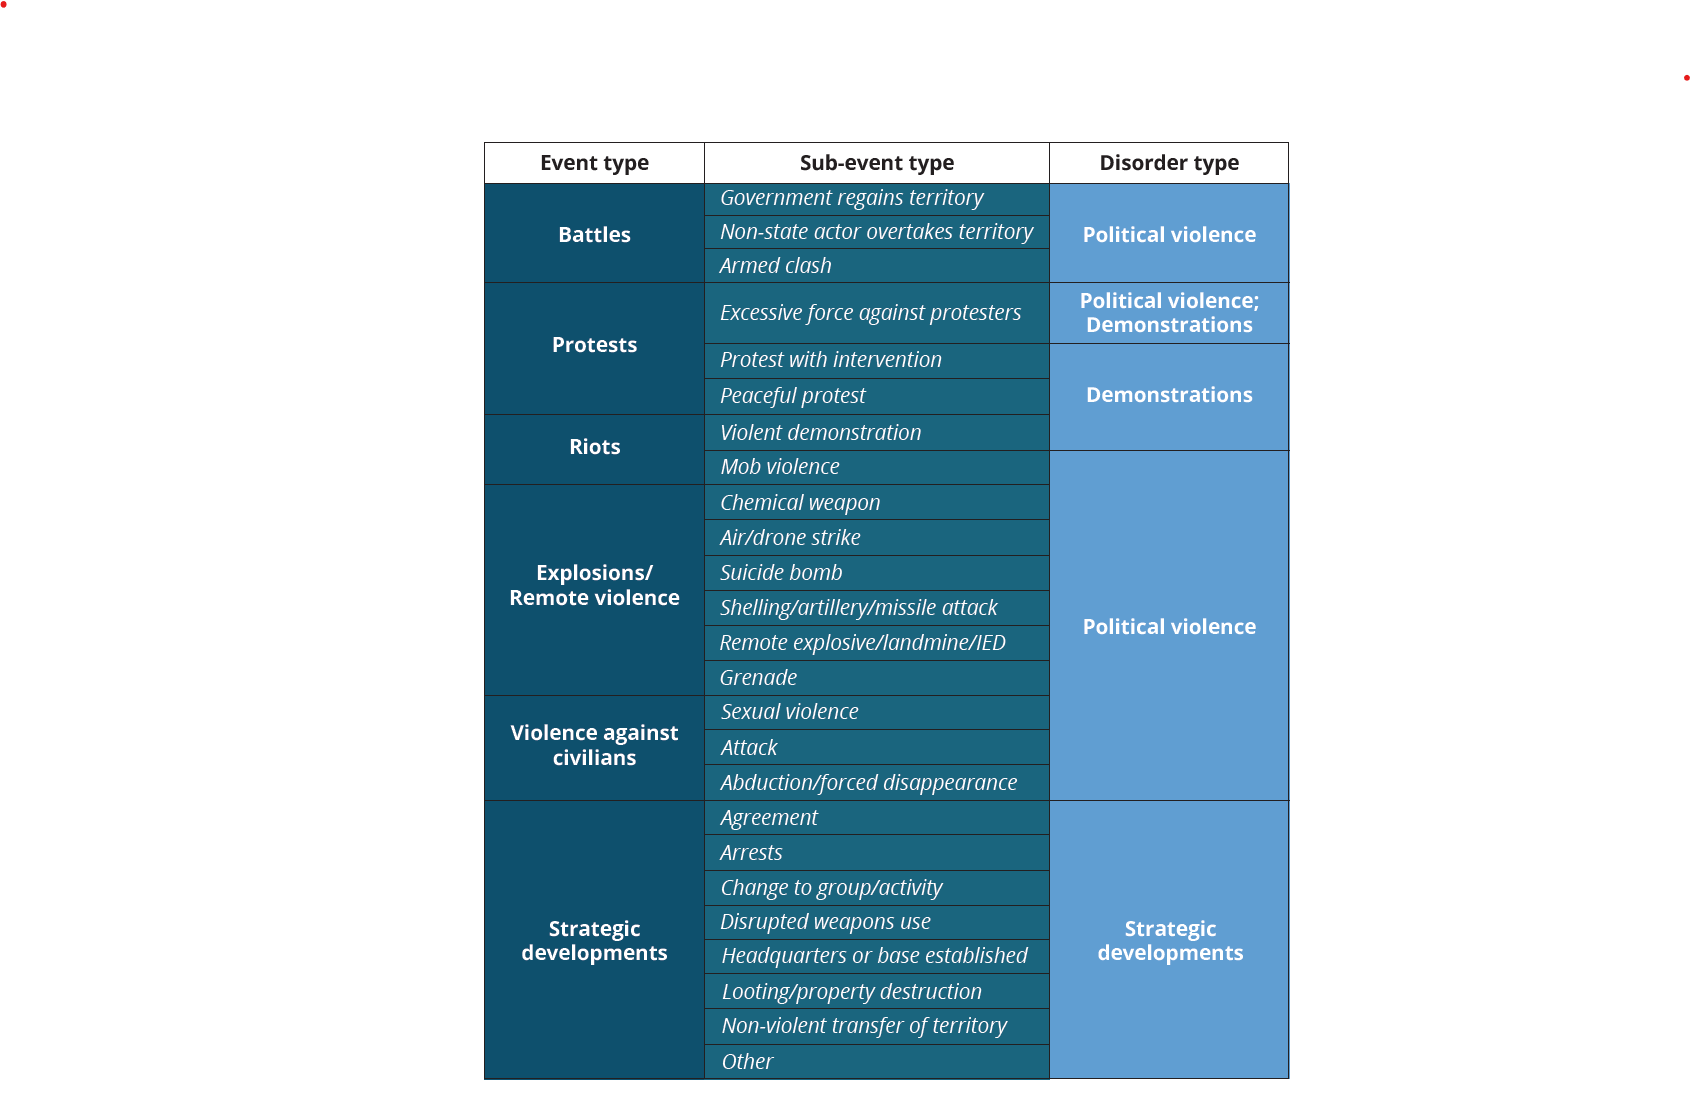

In [76]:
# acled_data_2004_2024.sub_event_type.value_counts()

In [77]:
#we can do another filtering on geo_precision to remove any locations which do not have a high certainity of location
#geo_precision is 'A numeric code between 1 and 3 indicating the level of certainty of the location 
#recorded for the event.The higher the number, the lower the precision.'
# acled_data_2004_2024.geo_precision.value_counts()

In [78]:
acled_2000_23.geo_precision.value_counts()

geo_precision
1    28853
2    11977
3     1326
Name: count, dtype: int64

In [166]:
acled_2000_23.shape

(42156, 32)

# Remove Duplicate

In [167]:
acled_2000_23.event_id_cnty.nunique()

24007

In [175]:
events = pd.DataFrame(acled_2000_23.event_id_cnty.value_counts())

In [186]:
duplicate_list = events[events['count'] == 2].index.tolist()

In [188]:
len(duplicate_list)

18149

In [190]:
acled_2000_23_cleaned = acled_2000_23.drop_duplicates(subset=['event_id_cnty'])

In [191]:
acled_2000_23_cleaned.shape

(24007, 32)

In [193]:
acled_2000_23_cleaned.event_id_cnty.nunique()

24007

In [194]:
# acled_2000_23[acled_2000_23['event_id_cnty'] == 'SUD17408']

In [84]:
acled_2000_23.event_type.value_counts()

event_type
Violence against civilians    13444
Battles                       12264
Protests                       7120
Explosions/Remote violence     4798
Strategic developments         3352
Riots                          1178
Name: count, dtype: int64

In [85]:
acled_temp = acled_2000_23[(acled_2000_23['year'] == 2023) & (acled_2000_23['event_type'] == 'Explosions/Remote violence')]

In [86]:
 acled_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 10388
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       1938 non-null   object 
 1   event_date          1938 non-null   object 
 2   year                1938 non-null   int64  
 3   time_precision      1938 non-null   int64  
 4   disorder_type       1938 non-null   object 
 5   event_type          1938 non-null   object 
 6   sub_event_type      1938 non-null   object 
 7   actor1              1938 non-null   object 
 8   assoc_actor_1       50 non-null     object 
 9   inter1              1938 non-null   int64  
 10  interaction         1938 non-null   int64  
 11  civilian_targeting  576 non-null    object 
 12  iso                 1938 non-null   int64  
 13  region              1938 non-null   object 
 14  country             1938 non-null   object 
 15  admin1              1938 non-null   object 
 16  admin2    

**Scatter Plot for Year 2004- conflict year**

<Axes: xlabel='longitude', ylabel='latitude'>

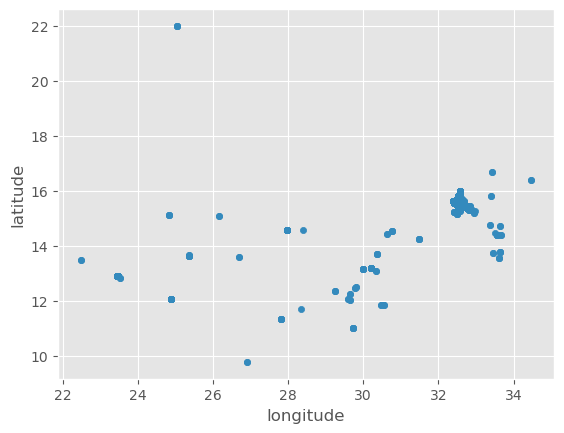

In [87]:
acled_temp.plot(x = 'longitude', y= 'latitude', kind = 'scatter')

# Filter sub-events

In [118]:
#acled_data_2004_2024.groupby(['sub_event_type','interaction']).count()

In [88]:
acled_2000_23.groupby(['event_type','sub_event_type','interaction']).count()

event_id_cnty  \
event_type                 sub_event_type                      interaction                  
Battles                    Armed clash                         11                     282   
                                                               12                    6418   
                                                               13                     748   
                                                               14                     438   
                                                               18                     122   
                                                               22                     216   
                                                               23                     180   
                                                               24                     210   
                                                               28                     228   
                                                               33                     112   
                                                               34                     164   
                                                               38                     286   
                                                               44                    1856   
                                                               48                      56   
                                                               88                       4   
                           Government regains territory        11                      10   
                                                               12                     354   
                                                               13                      14   
                                                               14                      12   
                                                               18                      28   
                                                               23                      10   
                                                               28                       8   
                           Non-state actor overtakes territory 11                       2   
                                                               12                     466   
                                                               13                       8   
                                                               14                       2   
                                                               18                       2   
                                                               22                       6   
                                                               23                      14   
                                                               24                       4   
                                                               28                       2   
                                                               44                       2   
Explosions/Remote violence Air/drone strike                    10                     239   
                                                               11                      18   
                                                               12                     942   
                                                               13                       8   
                                                               14                       2   
                                                               17                    1574   
                                                               18                      14   
                                                               20                       2   
                                                               27                       4   
                                                               28            

**Doing filtering based on the types of sub_event. After looking at the ACLED data it was observed that lots of events were not fire related so filtering some sub_event**

In [89]:
acled_df = acled_2000_23[acled_2000_23['sub_event_type'].isin([
    'Armed clash',
    'Attack',
    'Air/drone strike',
    'Shelling/artillery/missile attack',
    'Excessive force against protesters',
    'Violent demonstration',
    'Remote explosive/landmine/IED',
    'Mob violence',
    'Grenade',
    'Chemical weapon'
])]

In [90]:
print(f"Number of rows in filtered DataFrame: {len(acled_df)}")
print("\nUnique sub-event types in filtered DataFrame:")
print(acled_df['sub_event_type'].unique())

Number of rows in filtered DataFrame: 28998

Unique sub-event types in filtered DataFrame:
['Air/drone strike' 'Armed clash' 'Attack'
 'Shelling/artillery/missile attack' 'Remote explosive/landmine/IED'
 'Grenade' 'Mob violence' 'Violent demonstration'
 'Excessive force against protesters' 'Chemical weapon']


In [91]:
acled_df.shape

(28998, 32)

After filtering and selecting only those events which has the possibility of FIRES ..the dataframe has 28998 rows and 32 columns.

In [92]:
acled_df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'tags', 'timestamp', 'population_1km',
       'population_2km', 'population_5km', 'population_best'],
      dtype='object')

Also filtering one **sub_event_type = attack** and **interaction = 17** because that consist of 
STATE FORCES VERSUS CIVILIANS (e.g. state repression of civilians; arrests by police) which means there is very less chance it contains conflict by FIRE.

In [93]:
index_to_remove = acled_df[(acled_df["sub_event_type"] == "Attack") & (acled_df["interaction"] == 17)].index

In [94]:
len(index_to_remove)

2182

In [95]:
filtered_acled_df = acled_df.drop(index=index_to_remove, axis=0)

In [96]:
acled_df.shape

(28998, 32)

In [97]:
filtered_acled_df.shape

(26816, 32)

**Counting NULLS by Columns**

In [98]:
filtered_acled_df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

admin3                26816
tags                  25426
assoc_actor_1         21624
population_best       15371
population_5km        15371
population_1km        15369
population_2km        15369
civilian_targeting    14576
timestamp                 0
fatalities                0
notes                     0
source_scale              0
dtype: int64

Now we can remove **admin3** and **tags** as it has no important information and has highest null values.

In [99]:
filtered_acled_df.drop(columns=['admin3', 'tags'], inplace=True)

In [100]:
filtered_acled_df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'location', 'latitude',
       'longitude', 'geo_precision', 'source', 'source_scale', 'notes',
       'fatalities', 'timestamp', 'population_1km', 'population_2km',
       'population_5km', 'population_best'],
      dtype='object')

In [101]:
filtered_acled_df.shape

(26816, 30)

So, now after filtering the columns and null values. the filtered data has 26816 rows and 30 columns.

In [102]:
filtered_acled_df['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000])

Checking Columns for **geo_precision = 3** which says 

A numeric code between 1 and 3 indicating the level of certainty of the location recorded for the event. The higher the number, the lower the precision.

1, 2, or 3; with 1being the mostprecise.

In [103]:
filtered_acled_df.sample()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,geo_precision,source,source_scale,notes,fatalities,timestamp,population_1km,population_2km,population_5km,population_best
35170,SUD4183,30 January 2012,2012,1,Political violence,Battles,Armed clash,Military Forces of South Sudan (2011-),NaN,8,...,2,All Africa,International,Government forces rescue 16 Chinese workers ki...,0,1579554677,NaN,NaN,NaN,NaN


In [104]:
# index_to_remove = acled_df[(acled_df["sub_event_type"] == "Attack") & (acled_df["interaction"] == 17)].index

In [105]:
# temp = filtered_acled_df.drop(filtered_acled_df['geo_precision'] != 3

In [106]:
remove_index = filtered_acled_df[filtered_acled_df['geo_precision'] == 3].index

In [107]:
remove_index

Index([   81,    82,   123,   124,   526,   527,   610,   611,   814,   815,
       ...
       41768, 41769, 41770, 41771, 41772, 41773, 42129, 42130, 42150, 42151],
      dtype='int64', length=674)

In [108]:
filtered_acled_df1 = filtered_acled_df.drop(index=remove_index, axis=0)

In [109]:
#filtered_acled_df1

In [110]:
filtered_acled_df1.geo_precision.unique

<bound method Series.unique of 0        2
1        2
2        1
3        1
4        1
        ..
42149    2
42152    2
42153    2
42154    2
42155    2
Name: geo_precision, Length: 26142, dtype: int64>

In [111]:
filtered_acled_df1.geo_precision.value_counts()

geo_precision
1    17227
2     8915
Name: count, dtype: int64

In [112]:
#filtered_acled_df1

## Temp Plots for Checking

In [145]:
# filtered_acled_df_temp = filtered_acled_df[filtered_acled_df['year'] == 2004

In [146]:
# filtered_acled_df_temp.plot(x = 'longitude', y= 'latitude', kind = 'scatter')

In [147]:
# filtered_acled_df_temp = filtered_acled_df[filtered_acled_df['year'] == 2023]

In [148]:
# filtered_acled_df_temp.plot(x = 'longitude', y= 'latitude', kind = 'scatter')

In [149]:
filtered_acled_df_temp = filtered_acled_df[filtered_acled_df['year'] == 2004]

<Axes: xlabel='longitude', ylabel='latitude'>

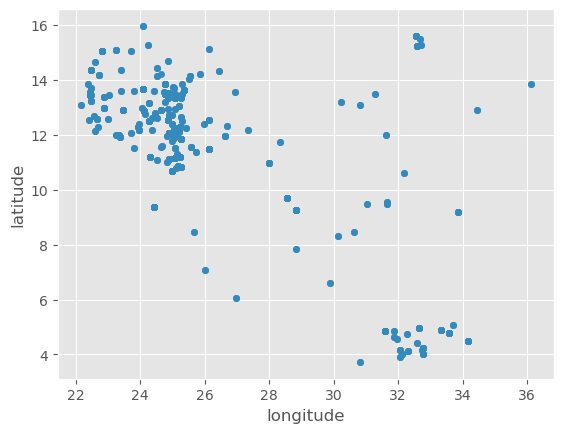

In [150]:
filtered_acled_df_temp.plot(x = 'longitude', y= 'latitude', kind = 'scatter')

**In the above plot we can see something interesting like most conflicts are near darfur region in Year 2003 compared to year 2023 where its concentrated at Khratoum the capital city and west darfur.**

In [151]:
filtered_acled_df_temp = filtered_acled_df[filtered_acled_df['year'] == 2023]

<Axes: xlabel='longitude', ylabel='latitude'>

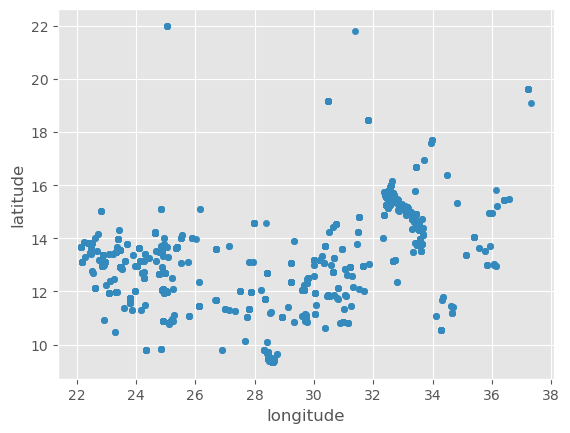

In [152]:
filtered_acled_df_temp.plot(x = 'longitude', y= 'latitude', kind = 'scatter')

**But if we plot year 2003 when conflicts were happening we do not have much data**

In [153]:
filtered_acled_df_temp = filtered_acled_df[filtered_acled_df['year'] == 2003]

<Axes: xlabel='longitude', ylabel='latitude'>

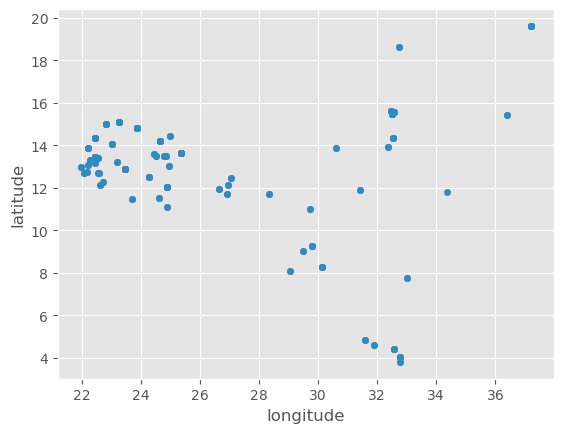

In [154]:
filtered_acled_df_temp.plot(x = 'longitude', y= 'latitude', kind = 'scatter')

## Save ACLED File

In [113]:
filtered_acled_df1.to_csv('filtered_ACLED_2000_23.csv', index=False, sep=',', encoding='utf-8', na_rep='NA')

In [114]:
# filtered_acled_df.to_csv('Filtered_ACLED_data.csv', index=False, sep=',', encoding='utf-8', na_rep='NA')

In [115]:
# acled_gdf = gpd.GeoDataFrame(acled_df, geometry=gpd.points_from_xy(acled_df.longitude, acled_df.latitude))

In [116]:
filtered_acled_df1.shape

(26142, 30)

**Checking Conflicts Fire each year**

In [117]:
# Grouping by 'year' and counting the number of events
conflict_counts_by_year = filtered_acled_df1.groupby("year").size().reset_index(name='conflict_count')

# Display the result
print("\nConflict Fire counts by year:")
print(conflict_counts_by_year)


Conflict Fire counts by year:
    year  conflict_count
0   2000             349
1   2001             313
2   2002             469
3   2003             306
4   2004             814
5   2005             508
6   2006             315
7   2007             196
8   2008             458
9   2009             559
10  2010             423
11  2011             422
12  2012             953
13  2013            1408
14  2014            1545
15  2015            1618
16  2016            1735
17  2017             887
18  2018             767
19  2019             747
20  2020             763
21  2021            1294
22  2022            1600
23  2023            7693


**TOTAL ACLED EVENTS in the dataset is 26142**
Total ACLED events in Sudan (all years):
23498

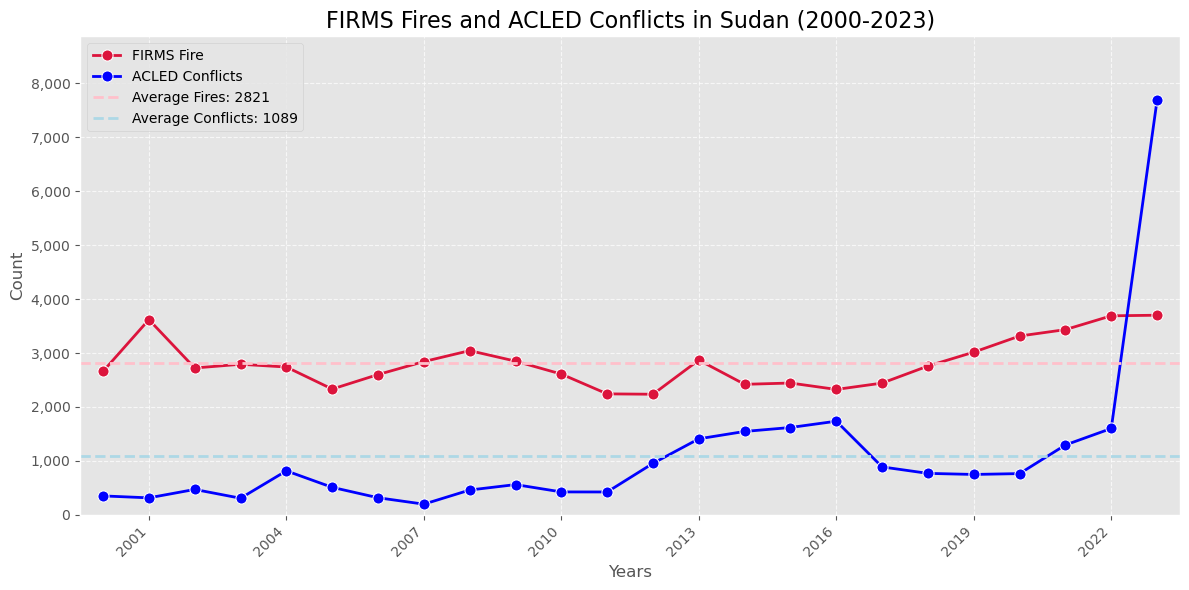

In [118]:
average_fireCount = yearly_fireCount_sum['fireCount'].mean()
average_acledCount = conflict_counts_by_year['conflict_count'].mean()

plt.figure(figsize=(12, 6))

# Create the line plot with a red-orange color
sns.lineplot(data=yearly_fireCount_sum, x='year', y='fireCount', marker='o', color='#DC143C', 
             linewidth=2, markersize=8,  label='FIRMS Fire')

# Create the line plot with a blue color
sns.lineplot(data=conflict_counts_by_year, x='year', y='conflict_count', marker='o', color='blue', 
             linewidth=2, markersize=8,  label='ACLED Conflicts')

# Add a horizontal line representing the average fire count
plt.axhline(y=average_fireCount, color='pink', linestyle='--', 
            linewidth=2, label=f'Average Fires: {average_fireCount:.0f}')

# Add a horizontal line representing the average acled count
plt.axhline(y=average_acledCount, color='lightblue', linestyle='--', linewidth=2, 
            label=f'Average Conflicts: {average_acledCount:.0f}')

# Customize the plot
plt.title('FIRMS Fires and ACLED Conflicts in Sudan (2000-2023)', fontsize=16) #, fontweight='bold')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis
years = firms_2000_2023['year'].unique()
plt.xticks(years, rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add space to x-axis
plt.xlim(min(years) - 0.5, max(years) + 0.5)

# Improve y-axis
plt.ylim(0, plt.ylim()[1] * 1.1)  # Add 10% space above the highest point

# Add thousands separator to y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('FIRMS_AND_ACLED_2000_2023_new.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [119]:
df = pd.DataFrame(conflict_counts_by_year)

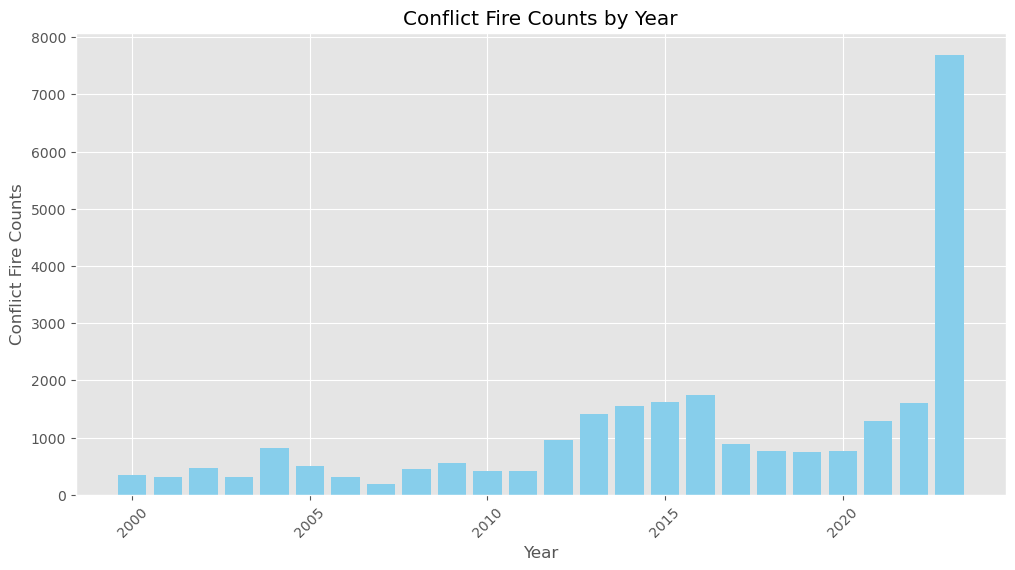

In [120]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(df['year'], df['conflict_count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Conflict Fire Counts')
plt.title('Conflict Fire Counts by Year')
plt.xticks(rotation=45)
plt.show()

In [121]:
# Grouping by 'year' and counting the number of events
event_counts_by_year = filtered_acled_df.groupby("year").size().reset_index(name='event_count')

# Display the result
print("\nEvent counts by year:")
print(event_counts_by_year)



Event counts by year:
    year  event_count
0   2000          359
1   2001          321
2   2002          529
3   2003          334
4   2004          870
5   2005          538
6   2006          337
7   2007          218
8   2008          504
9   2009          583
10  2010          451
11  2011          454
12  2012          995
13  2013         1430
14  2014         1551
15  2015         1726
16  2016         1747
17  2017          897
18  2018          771
19  2019          754
20  2020          780
21  2021         1311
22  2022         1607
23  2023         7749


In [122]:
# acled_gdf.head()

In [123]:
# from shapely.geometry import Point, box

In [124]:
# # Load the Sudan boundary
# sudan_gdf = gpd.read_file('data/gadm41_SDN.gpkg')

# # Create a function to generate the grid
# def create_grid(bbox, grid_size):
#     xmin, ymin, xmax, ymax = bbox
#     cols = np.arange(xmin, xmax, grid_size)
#     rows = np.arange(ymin, ymax, grid_size)
#     polygons = []
#     for x in cols:
#         for y in rows:
#             polygons.append(box(x, y, x + grid_size, y + grid_size))
#     return gpd.GeoDataFrame({'geometry': polygons})

# # Create the grid
# sudan_bbox = sudan_gdf.total_bounds
# grid_gdf = create_grid(sudan_bbox, grid_size)

# # Filter the grid cells that intersect with Sudan
# grid_gdf = gpd.overlay(grid_gdf, sudan_gdf, how='intersection')


In [186]:
# # Spatial join to count events in each grid cell
# join_gdf = gpd.sjoin(grid_gdf, acled_gdf, how="left", op="contains")

# # Check the join_gdf columns to debug
# print(join_gdf.columns)

# # Check for the 'index_left' column in the joined GeoDataFrame
# if 'index_left' in join_gdf.columns:
#     # Count the events per grid cell
#     event_counts = join_gdf.groupby('index_left').size()

#     # Add event counts to the grid GeoDataFrame
#     grid_gdf['event_count'] = event_counts.values

#     # Replace NaN values with 0 (for grid cells with no events)
#     grid_gdf['event_count'] = grid_gdf['event_count'].fillna(0)
# else:
#     print("The 'index_left' column is not present in the joined GeoDataFrame. Check the spatial join operation.")

# # Print the result
# print(grid_gdf)

# # Save the result to a CSV file
# grid_gdf.to_csv('sudan_acled_counts_grid_2022.csv')

## old data -not using now-loading the ACLED_with_Grid_Count from Google Earth Engine

In [73]:
acled_grid_2004 = pd.read_csv("data/ACLED_2004_Counts_year.csv", encoding = "latin1")

In [74]:
acled_grid_2005 = pd.read_csv("data/ACLED_2005_Counts.csv", encoding = "latin1")

In [75]:
acled_grid_2006 = pd.read_csv("data/ACLED_2006_Counts_.csv", encoding = "latin1")

In [76]:
acled_grid_2007 = pd.read_csv("data/ACLED_2007_Counts_.csv", encoding = "latin1")

In [77]:
acled_grid_2008 = pd.read_csv("data/ACLED_2008_Counts_.csv", encoding = "latin1")

In [78]:
acled_grid_2009 = pd.read_csv("data/ACLED_2009_Counts_.csv", encoding = "latin1")

In [79]:
acled_grid_2010 = pd.read_csv("data/ACLED_2010_Counts_.csv", encoding = "latin1")

In [80]:
acled_grid_2011 = pd.read_csv("data/ACLED_2011_Counts_.csv", encoding = "latin1")

In [81]:
acled_grid_2012 = pd.read_csv("data/ACLED_2012_Counts_.csv", encoding = "latin1")

In [82]:
acled_grid_2013 = pd.read_csv("data/ACLED_2013_Counts_.csv", encoding = "latin1")

In [83]:
acled_grid_2014 = pd.read_csv("data/ACLED_2014_Counts_.csv", encoding = "latin1")

In [84]:
acled_grid_2015 = pd.read_csv("data/ACLED_2015_Counts_.csv", encoding = "latin1")

In [85]:
acled_grid_2016 = pd.read_csv("data/ACLED_2016_Counts_.csv", encoding = "latin1")

In [86]:
acled_grid_2017 = pd.read_csv("data/ACLED_2017_Counts_.csv", encoding = "latin1")
acled_grid_2018 = pd.read_csv("data/ACLED_2018_Counts_.csv", encoding = "latin1")
acled_grid_2019 = pd.read_csv("data/ACLED_2019_Counts_.csv", encoding = "latin1")
acled_grid_2020 = pd.read_csv("data/ACLED_2020_Counts_.csv", encoding = "latin1")
acled_grid_2021 = pd.read_csv("data/ACLED_2021_Counts_.csv", encoding = "latin1")
acled_grid_2022 = pd.read_csv("data/ACLED_2022_Counts_.csv", encoding = "latin1")
acled_grid_2023 = pd.read_csv("data/ACLED_2023_Counts_.csv", encoding = "latin1")

In [87]:
acled_grid_2024 = pd.read_csv("data/ACLED_2024_Counts_.csv", encoding = "latin1")

In [88]:
acled_2004_2024 = pd.concat([acled_grid_2004, acled_grid_2005, acled_grid_2006, acled_grid_2007, acled_grid_2008, acled_grid_2009, acled_grid_2010, acled_grid_2011, acled_grid_2012, acled_grid_2013, acled_grid_2014, acled_grid_2015, acled_grid_2016, acled_grid_2017, acled_grid_2018, acled_grid_2019, acled_grid_2020, acled_grid_2021, acled_grid_2022, acled_grid_2023, acled_grid_2024], ignore_index = True)

In [89]:
acled_2004_2024.shape

(17850, 5)

In [91]:
acled_grid_2024.describe(include='all')

,system:index,acled_count,grid_id,year,.geo
count,850,850.0000,850,850.0000,850
unique,850,NaN,850,NaN,850
top,"52,19",NaN,"52,19",NaN,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
freq,1,NaN,1,NaN,1
mean,NaN,6.7788,NaN,"2,024.0000",NaN
std,NaN,77.0482,NaN,0.0000,NaN
min,NaN,0.0000,NaN,"2,024.0000",NaN
25%,NaN,0.0000,NaN,"2,024.0000",NaN
50%,NaN,0.0000,NaN,"2,024.0000",NaN
75%,NaN,0.0000,NaN,"2,024.0000",NaN


In [92]:
# Sort by year and grid_id
acled_2004_2024 = acled_2004_2024.sort_values(['year', 'grid_id'])

# Reset the index
acled_2004_2024 = acled_2004_2024.reset_index(drop=True)

# View the first few rows
print(acled_2004_2024.head())

# Save to a new CSV file
acled_2004_2024.to_csv('acled_grid_2004_2024_combined.csv', index=False)

  system:index  acled_count grid_id  year  \
0        48,28            0   48,28  2004   
1        48,29            2   48,29  2004   
2        49,27            0   49,27  2004   
3        49,28            0   49,28  2004   
4        49,29           50   49,29  2004   

                                                .geo  
0  {"geodesic":false,"crs":{"type":"name","proper...  
1  {"geodesic":false,"crs":{"type":"name","proper...  
2  {"geodesic":false,"crs":{"type":"name","proper...  
3  {"geodesic":false,"crs":{"type":"name","proper...  
4  {"geodesic":false,"crs":{"type":"name","proper...  


In [93]:
#acled_2004_2024

In [94]:
#final_merge_fire_data_2004_2024

## (NOT USING)-Adding Filtered ACLED data after taking only taking those events which includes fire--New ACLED Data

In [3]:
acled_new_2004 = pd.read_csv("data/filtered_acled_data/ACLED_2004_Counts.csv", encoding = "latin1")

In [4]:
acled_new_2004

,system:index,acled_count,grid_id,year,.geo
0,"52,19",0,"52,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,"53,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,"54,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,"52,20",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,"53,20",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
845,"70,49",0,"70,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
846,"79,49",0,"79,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
847,"80,49",0,"80,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
848,"81,49",0,"81,49",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [5]:
acled_new_2005 = pd.read_csv("data/filtered_acled_data/ACLED_2005_Counts.csv", encoding = "latin1")
acled_new_2006 = pd.read_csv("data/filtered_acled_data/ACLED_2006_Counts.csv", encoding = "latin1")
acled_new_2007 = pd.read_csv("data/filtered_acled_data/ACLED_2007_Counts.csv", encoding = "latin1")
acled_new_2008 = pd.read_csv("data/filtered_acled_data/ACLED_2008_Counts.csv", encoding = "latin1")
acled_new_2009 = pd.read_csv("data/filtered_acled_data/ACLED_2009_Counts.csv", encoding = "latin1")
acled_new_2010 = pd.read_csv("data/filtered_acled_data/ACLED_2010_Counts.csv", encoding = "latin1")

In [6]:
acled_new_2007

,system:index,acled_count,grid_id,year,.geo
0,"52,19",0,"52,19",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,"53,19",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,"54,19",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,"52,20",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,"53,20",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
845,"70,49",0,"70,49",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
846,"79,49",0,"79,49",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
847,"80,49",0,"80,49",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
848,"81,49",0,"81,49",2007,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [7]:
acled_new_2011 = pd.read_csv("data/filtered_acled_data/ACLED_2011_Counts.csv", encoding = "latin1")
acled_new_2012 = pd.read_csv("data/filtered_acled_data/ACLED_2012_Counts.csv", encoding = "latin1")
acled_new_2013 = pd.read_csv("data/filtered_acled_data/ACLED_2013_Counts.csv", encoding = "latin1")
acled_new_2014 = pd.read_csv("data/filtered_acled_data/ACLED_2014_Counts.csv", encoding = "latin1")
acled_new_2015 = pd.read_csv("data/filtered_acled_data/ACLED_2015_Counts.csv", encoding = "latin1")
acled_new_2016 = pd.read_csv("data/filtered_acled_data/ACLED_2016_Counts.csv", encoding = "latin1")
acled_new_2017 = pd.read_csv("data/filtered_acled_data/ACLED_2017_Counts.csv", encoding = "latin1")
acled_new_2018 = pd.read_csv("data/filtered_acled_data/ACLED_2018_Counts.csv", encoding = "latin1")

In [8]:
acled_new_2015 

,system:index,acled_count,grid_id,year,.geo
0,"52,19",0,"52,19",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,"53,19",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,"54,19",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,"52,20",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,"53,20",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
845,"70,49",0,"70,49",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
846,"79,49",0,"79,49",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
847,"80,49",0,"80,49",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
848,"81,49",0,"81,49",2015,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [9]:
acled_new_2019 = pd.read_csv("data/filtered_acled_data/ACLED_2019_Counts.csv", encoding = "latin1")
acled_new_2020 = pd.read_csv("data/filtered_acled_data/ACLED_2020_Counts.csv", encoding = "latin1")
acled_new_2021 = pd.read_csv("data/filtered_acled_data/ACLED_2021_Counts.csv", encoding = "latin1")
acled_new_2022 = pd.read_csv("data/filtered_acled_data/ACLED_2022_Counts.csv", encoding = "latin1")
acled_new_2023 = pd.read_csv("data/filtered_acled_data/ACLED_2023_Counts.csv", encoding = "latin1")
acled_new_2024 = pd.read_csv("data/filtered_acled_data/ACLED_2024_Counts.csv", encoding = "latin1")

In [10]:
acled_new_2022

,system:index,acled_count,grid_id,year,.geo
0,"52,19",0,"52,19",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,"53,19",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,"54,19",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,"52,20",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,"53,20",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
845,"70,49",0,"70,49",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
846,"79,49",0,"79,49",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
847,"80,49",0,"80,49",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
848,"81,49",0,"81,49",2022,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


Joining all the acled dataframe to make one combined dataset for 2004-2024

In [12]:
acled_all_data_2004_24 = pd.concat([acled_new_2004,acled_new_2005,acled_new_2006,acled_new_2007,acled_new_2008,acled_new_2009,acled_new_2010,acled_new_2011,acled_new_2012,acled_new_2013,acled_new_2014,acled_new_2015,acled_new_2016,acled_new_2017,acled_new_2018,acled_new_2019,acled_new_2020,acled_new_2021,acled_new_2022,acled_new_2023,acled_new_2024], ignore_index = True)

In [13]:
acled_all_data_2004_24

,system:index,acled_count,grid_id,year,.geo
0,"52,19",0,"52,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,"53,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,"54,19",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,"52,20",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,"53,20",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
17845,"70,49",0,"70,49",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17846,"79,49",0,"79,49",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17847,"80,49",0,"80,49",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17848,"81,49",0,"81,49",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [14]:
acled_all_data_2004_24.shape

(17850, 5)

In [15]:
acled_all_data_2004_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17850 entries, 0 to 17849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   system:index  17850 non-null  object
 1   acled_count   17850 non-null  int64 
 2   grid_id       17850 non-null  object
 3   year          17850 non-null  int64 
 4   .geo          17850 non-null  object
dtypes: int64(2), object(3)
memory usage: 697.4+ KB


In [16]:
# Sort by year and grid_id
acled_all_data_2004_24 = acled_all_data_2004_24.sort_values(['year', 'grid_id'])

In [17]:
acled_all_data_2004_24

,system:index,acled_count,grid_id,year,.geo
185,"48,28",0,"48,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
218,"48,29",2,"48,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
154,"49,27",0,"49,27",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
186,"49,28",0,"49,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
219,"49,29",44,"49,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
17635,"84,41",0,"84,41",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17668,"84,42",0,"84,42",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17570,"85,39",0,"85,39",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17603,"85,40",0,"85,40",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [18]:
# Reset the index
acled_all_data_2004_24= acled_all_data_2004_24.reset_index(drop=True)

In [19]:
# View the first few rows
print(acled_all_data_2004_24.head())

  system:index  acled_count grid_id  year  \
0        48,28            0   48,28  2004   
1        48,29            2   48,29  2004   
2        49,27            0   49,27  2004   
3        49,28            0   49,28  2004   
4        49,29           44   49,29  2004   

                                                .geo  
0  {"geodesic":false,"crs":{"type":"name","proper...  
1  {"geodesic":false,"crs":{"type":"name","proper...  
2  {"geodesic":false,"crs":{"type":"name","proper...  
3  {"geodesic":false,"crs":{"type":"name","proper...  
4  {"geodesic":false,"crs":{"type":"name","proper...  


In [20]:
acled_all_data_2004_24.isnull().sum(axis=0).sort_values(ascending=False)[:12]

system:index    0
acled_count     0
grid_id         0
year            0
.geo            0
dtype: int64

In [22]:
acled_all_data_2004_24= acled_all_data_2004_24.drop(columns=['system:index'])

In [23]:
acled_all_data_2004_24

,acled_count,grid_id,year,.geo
0,0,"48,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,2,"48,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,0,"49,27",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,0,"49,28",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,44,"49,29",2004,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...
17845,0,"84,41",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17846,0,"84,42",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17847,0,"85,39",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17848,0,"85,40",2024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [24]:
# Save to a new CSV file
acled_all_data_2004_24.to_csv('acled_new_filtered_2004_24.csv', index=False)

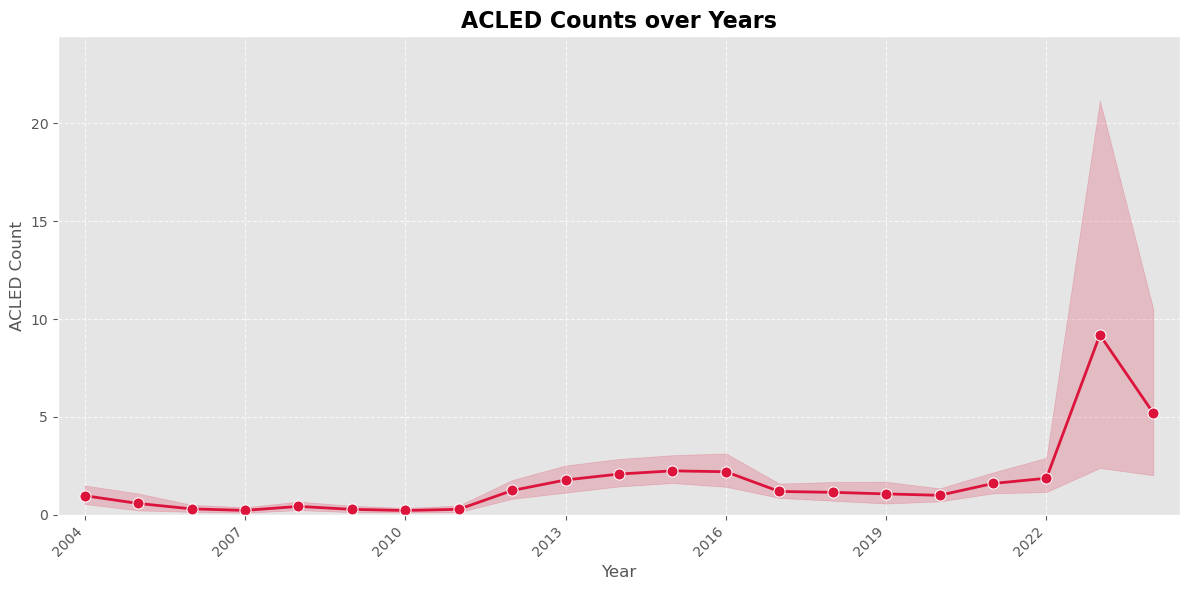

In [31]:
plt.figure(figsize=(12, 6))

# Create the line plot with a red-orange color
sns.lineplot(data=acled_all_data_2004_24, x='year', y='acled_count', marker='o', color='#DC143C', linewidth=2, markersize=8)

# Customize the plot
plt.title('ACLED Counts over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('ACLED Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize x-axis
years = acled_all_data_2004_24['year'].unique()
plt.xticks(years, rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add space to x-axis
plt.xlim(min(years) - 0.5, max(years) + 0.5)

# Improve y-axis
plt.ylim(0, plt.ylim()[1] * 1.1)  # Add 10% space above the highest point

# Add thousands separator to y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('ACLED_Conflicts_filtered1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

**With this filtered data we can see that there's a peak in the year 2023 and 2024**

# Loading ACLED filtered year 2000-2023 from Google Earth Engine


In [125]:
acled0= pd.read_csv("data/new_acled_2000_23/ACLED_2000.csv", encoding = "latin1")

In [126]:
acled1= pd.read_csv("data/new_acled_2000_23/ACLED_2001.csv", encoding = "latin1")

In [127]:
acled2= pd.read_csv("data/new_acled_2000_23/ACLED_2002.csv", encoding = "latin1")

In [128]:
acled3= pd.read_csv("data/new_acled_2000_23/ACLED_2003.csv", encoding = "latin1")

In [129]:
acled4= pd.read_csv("data/new_acled_2000_23/ACLED_2004.csv", encoding = "latin1")

In [130]:
acled5= pd.read_csv("data/new_acled_2000_23/ACLED_2005.csv", encoding = "latin1")

In [131]:
acled6= pd.read_csv("data/new_acled_2000_23/ACLED_2006.csv", encoding = "latin1")

In [132]:
acled7= pd.read_csv("data/new_acled_2000_23/ACLED_2007.csv", encoding = "latin1")

In [133]:
acled8= pd.read_csv("data/new_acled_2000_23/ACLED_2008.csv", encoding = "latin1")

In [134]:
acled9= pd.read_csv("data/new_acled_2000_23/ACLED_2009.csv", encoding = "latin1")

In [135]:
acled10= pd.read_csv("data/new_acled_2000_23/ACLED_2010.csv", encoding = "latin1")

In [136]:
acled10

,system:index,acled_count,acled_event_ids,grid_id,year,.geo
0,"52,19",0,[],"52,19",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,[],"53,19",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,[],"54,19",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,[],"52,20",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,[],"53,20",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...
845,"70,49",0,[],"70,49",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
846,"79,49",0,[],"79,49",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
847,"80,49",0,[],"80,49",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
848,"81,49",0,[],"81,49",2010,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [137]:
acled11= pd.read_csv("data/new_acled_2000_23/ACLED_2011.csv", encoding = "latin1")
acled12= pd.read_csv("data/new_acled_2000_23/ACLED_2012.csv", encoding = "latin1")
acled13= pd.read_csv("data/new_acled_2000_23/ACLED_2013.csv", encoding = "latin1")
acled14= pd.read_csv("data/new_acled_2000_23/ACLED_2014.csv", encoding = "latin1")
acled15= pd.read_csv("data/new_acled_2000_23/ACLED_2015.csv", encoding = "latin1")
acled16= pd.read_csv("data/new_acled_2000_23/ACLED_2016.csv", encoding = "latin1")
acled17= pd.read_csv("data/new_acled_2000_23/ACLED_2017.csv", encoding = "latin1")
acled18= pd.read_csv("data/new_acled_2000_23/ACLED_2018.csv", encoding = "latin1")
acled19= pd.read_csv("data/new_acled_2000_23/ACLED_2019.csv", encoding = "latin1")
acled20= pd.read_csv("data/new_acled_2000_23/ACLED_2020.csv", encoding = "latin1")
acled21= pd.read_csv("data/new_acled_2000_23/ACLED_2021.csv", encoding = "latin1")
acled22= pd.read_csv("data/new_acled_2000_23/ACLED_2022.csv", encoding = "latin1")

In [138]:
acled23= pd.read_csv("data/new_acled_2000_23/ACLED_2023.csv", encoding = "latin1")

In [139]:
acled23

,system:index,acled_count,acled_event_ids,grid_id,year,.geo
0,"52,19",0,[],"52,19",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,[],"53,19",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,[],"54,19",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,[],"52,20",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,[],"53,20",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...
845,"70,49",0,[],"70,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
846,"79,49",0,[],"79,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
847,"80,49",0,[],"80,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
848,"81,49",0,[],"81,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


**JOINING ALL THE ACLED FILES**

In [140]:
acled_joined = pd.concat([acled0, acled1, acled2, acled3, acled4, acled5, acled6, acled7, 
                          acled8, acled9, acled10, acled11, acled12, acled13, acled14, acled15,
                          acled16, acled17, acled18, acled19, acled20, acled21, acled22, acled23],
                         ignore_index = True)

In [141]:
acled_joined

,system:index,acled_count,acled_event_ids,grid_id,year,.geo
0,"52,19",0,[],"52,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"53,19",0,[],"53,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"54,19",0,[],"54,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"52,20",0,[],"52,20",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"53,20",0,[],"53,20",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...
20395,"70,49",0,[],"70,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,"79,49",0,[],"79,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,"80,49",0,[],"80,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,"81,49",0,[],"81,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [142]:
acled_joined.shape

(20400, 6)

In [143]:
acled_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   system:index     20400 non-null  object
 1   acled_count      20400 non-null  int64 
 2   acled_event_ids  20400 non-null  object
 3   grid_id          20400 non-null  object
 4   year             20400 non-null  int64 
 5   .geo             20400 non-null  object
dtypes: int64(2), object(4)
memory usage: 956.4+ KB


In [144]:
# Sort by year and grid_id
acled_joined = acled_joined.sort_values(['year', 'grid_id'])

In [145]:
acled_joined= acled_joined.reset_index(drop=True)

In [146]:
acled_joined

,system:index,acled_count,acled_event_ids,grid_id,year,.geo
0,"48,28",0,[],"48,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"48,29",0,[],"48,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"49,27",0,[],"49,27",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"49,28",0,[],"49,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"49,29",0,[],"49,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...
20395,"84,41",0,[],"84,41",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,"84,42",0,[],"84,42",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,"85,39",0,[],"85,39",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,"85,40",0,[],"85,40",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [147]:
acled_joined.isnull().sum(axis=0).sort_values(ascending=False)[:12]

system:index       0
acled_count        0
acled_event_ids    0
grid_id            0
year               0
.geo               0
dtype: int64

**NO NULL VALUES PRESENT IN THE DATA**

In [148]:
acled_joined= acled_joined.drop(columns=['system:index'])

In [149]:
acled_joined

,acled_count,acled_event_ids,grid_id,year,.geo
0,0,[],"48,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,0,[],"48,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,0,[],"49,27",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,0,[],"49,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,0,[],"49,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
20395,0,[],"84,41",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,0,[],"84,42",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,0,[],"85,39",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,0,[],"85,40",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


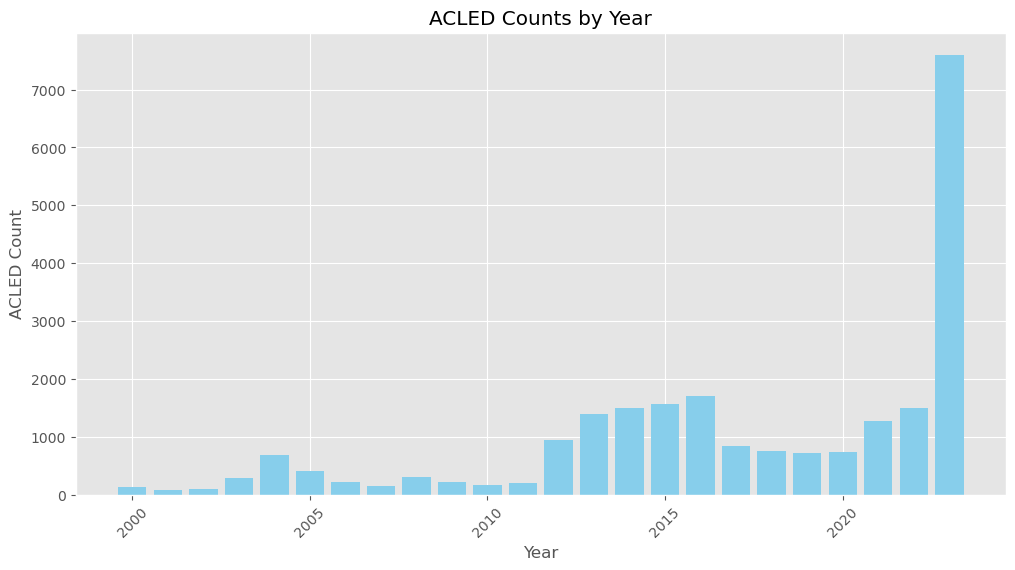

In [151]:
# Aggregate the acled_count by year
yearly_counts = acled_joined.groupby('year')['acled_count'].sum().reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts['year'], yearly_counts['acled_count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('ACLED Count')
plt.title('ACLED Counts by Year')
plt.xticks(rotation=45)
plt.show()

In [152]:
# Save to a new CSV file
acled_joined.to_csv('acled_2000_23.csv', index=False)

# EXPLOSIVE

In [161]:
filtered_acled_df.sample()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,geo_precision,source,source_scale,notes,fatalities,timestamp,population_1km,population_2km,population_5km,population_best
5000,SUD21848,24 August 2023,2023,1,Political violence,Battles,Armed clash,Rapid Support Forces,NaN,2,...,2,Sudan Akhbar,National,"On 24 August 2023, SAF targeted RSF by airstri...",0,1710804489,"26,527.0000","70,658.0000","82,595.0000","82,595.0000"


In [162]:
filtered_acled_df.event_id_cnty.value_counts()

event_id_cnty
SUD24855    2
SUD6967     2
SUD6906     2
SUD6907     2
SUD6901     2
           ..
SUD14413    1
SUD7148     1
SUD6303     1
SUD9709     1
SUD12037    1
Name: count, Length: 13703, dtype: int64

In [165]:
filtered_acled_df[filtered_acled_df['event_id_cnty'] == 'SUD24855']

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,civilian_targeting,iso,region,country,admin1,admin2,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,population_1km,population_2km,population_5km,population_best
0,SUD24855,31 December 2023,2023,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),NaN,1,12,NaN,729,Northern Africa,Sudan,Khartoum,Khartoum,Khartoum - Al Mujahdeen,15.5287,32.5806,2,Al Mashhad Al Sudani; Al Rakoba; Alnilin; Suda...,New media-National,"On 31 December 2023, SAF fighter drones target...",0,1704766944,"14,118.0000","30,471.0000","31,847.0000","31,847.0000"
1,SUD24855,31 December 2023,2023,1,Political violence,Explosions/Remote violence,Air/drone strike,Rapid Support Forces,NaN,2,12,NaN,729,Northern Africa,Sudan,Khartoum,Khartoum,Khartoum - Al Mujahdeen,15.5287,32.5806,2,Al Mashhad Al Sudani; Al Rakoba; Alnilin; Suda...,New media-National,"On 31 December 2023, SAF fighter drones target...",0,1704766944,"14,118.0000","30,471.0000","31,847.0000","31,847.0000"


In [159]:
filtered_acled_df[filtered_acled_df['event_type'] == 'Explosions/Remote violence']['event_id_cnty'].nunique()

2571

In [154]:
acled_explosive = acled_joined.copy()

In [155]:
acled_explosive

,acled_count,acled_event_ids,grid_id,year,.geo
0,0,[],"48,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,0,[],"48,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,0,[],"49,27",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,0,[],"49,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,0,[],"49,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
20395,0,[],"84,41",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,0,[],"84,42",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,0,[],"85,39",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,0,[],"85,40",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


# Data Analysis of ACLED AND FIRMS

**For our Analysis we need to join ACLED dataset and FIRMS Fire data to make a Panel data with each grid and for every year**

In [71]:
firms_2000_2023

,fireCount,grid_id,year,.geo
0,18,"52,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,4,"52,19",2001,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,18,"53,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,13,"53,19",2001,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,14,"54,19",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...
1691,0,"70,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1693,0,"79,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1695,0,"80,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1697,0,"81,49",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [72]:
acled_joined

,acled_count,acled_event_ids,grid_id,year,.geo
0,0,[],"48,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,0,[],"48,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,0,[],"49,27",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,0,[],"49,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,0,[],"49,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...
20395,0,[],"84,41",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,0,[],"84,42",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,0,[],"85,39",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,0,[],"85,40",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [73]:
#Joining ACLED Conflict Count with FIRMS Fire data
acf_2000_23 = pd.merge(acled_joined,firms_2000_2023, on=['grid_id','year'], how='outer')

In [74]:
acf_2000_23.year.value_counts()

year
2000    850
2001    850
2022    850
2021    850
2020    850
2019    850
2018    850
2017    850
2016    850
2015    850
2014    850
2013    850
2012    850
2011    850
2010    850
2009    850
2008    850
2007    850
2006    850
2005    850
2004    850
2003    850
2002    850
2023    850
Name: count, dtype: int64

In [75]:
acf_2000_23

,acled_count,acled_event_ids,grid_id,year,.geo_x,fireCount,.geo_y
0,0,[],"48,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,0,[],"48,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,0,[],"49,27",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",2,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,0,[],"49,28",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",9,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,0,[],"49,29",2000,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...,...
20395,0,[],"84,41",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",4,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,0,[],"84,42",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,0,[],"85,39",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",0,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,0,[],"85,40",2023,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [76]:
acf_2000_23 = acf_2000_23.rename(columns={'.geo_x': 'geo_acled', '.geo_y': 'geo_fire'})

In [77]:
acf_2000_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   acled_count      20400 non-null  int64 
 1   acled_event_ids  20400 non-null  object
 2   grid_id          20400 non-null  object
 3   year             20400 non-null  int64 
 4   geo_acled        20400 non-null  object
 5   fireCount        20400 non-null  int64 
 6   geo_fire         20400 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [78]:
# Rearrange columns
new_column_order = [
    'grid_id',
    'year',
    'fireCount',
    'acled_count',
    'acled_event_ids',
    'geo_fire',
    'geo_acled'
]

# Reorder the columns
acf_2000_23 = acf_2000_23[new_column_order]

In [79]:
acf_2000_23 

,grid_id,year,fireCount,acled_count,acled_event_ids,geo_fire,geo_acled
0,"48,28",2000,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"48,29",2000,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"49,27",2000,2,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"49,28",2000,9,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"49,29",2000,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...,...
20395,"84,41",2023,4,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20396,"84,42",2023,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20397,"85,39",2023,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
20398,"85,40",2023,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [337]:
# # Merge the DataFrames
# merged_df = pd.merge(acled_2004_2024, final_merge_fire_data_2004_2024, on=['grid_id', 'year'], how='outer')

In [338]:
#Joining ACLED Conflict Count with FIRMS Fire data
#acled_firms_Count_2004_24 = pd.merge(acled_all_data_2004_24,final_merge_fire_data_2004_2024, on=['grid_id','year'], how='outer')

In [339]:
#acled_firms_Count_2004_24 

In [340]:
# Rename the '.geo' columns
#acled_firms_Count_2004_24  = acled_firms_Count_2004_24.rename(columns={'.geo_x': 'geo_acled', '.geo_y': 'geo_fire'})

In [341]:
#acled_firms_Count_2004_24

In [342]:
# merged_df

In [343]:
# Rename the '.geo' columns
# merged_df = merged_df.rename(columns={'.geo_x': 'geo_acled', '.geo_y': 'geo_fire'})

In [344]:
# merged_df 

In [345]:
# merged_df.shape

_The combined dataset has 17850 rows and 8 columns._

In [346]:
# merged_df.info(verbose=True)

In [347]:
# #Counting Null values by Column
# merged_df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

In [348]:
# #Counting Null values by Rows
# merged_df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

_There are No NULL Values_

In [349]:
#acled_firms_Count_2004_24.info()

In [350]:
#acled_firms_Count_2004_24= acled_firms_Count_2004_24.drop(columns=['system:index'])

In [351]:
#acled_firms_Count_2004_24

In [352]:
# # Rearrange columns
# new_column_order = [
#     'grid_id',
#     'year',
#     'fireCount',
#     'acled_count',
#     'geo_fire',
#     'geo_acled'
# ]

# # Reorder the columns
# acled_firms_Count_2004_24 = acled_firms_Count_2004_24[new_column_order]

In [353]:
# acled_firms_Count_2004_24

**Checking for NULL values**

In [80]:
 #Counting Null values by Column
acf_2000_23.isnull().sum(axis=0).sort_values(ascending=False)[:12]

grid_id            0
year               0
fireCount          0
acled_count        0
acled_event_ids    0
geo_fire           0
geo_acled          0
dtype: int64

In [81]:
#Counting Null values by Rows
acf_2000_23.isnull().sum(axis=1).sort_values(ascending=False).head(20)


0        0
13597    0
13604    0
13603    0
13602    0
13601    0
13600    0
13599    0
13598    0
13596    0
13606    0
13595    0
13594    0
13593    0
13592    0
13591    0
13590    0
13589    0
13605    0
13607    0
dtype: int64

**the above dataset has no null values.**


In [82]:
#  Fill NaN values
acf_2000_23 ['acled_count'] = acf_2000_23['acled_count'].fillna(0)
acf_2000_23 ['fireCount'] = acf_2000_23['fireCount'].fillna(0)

In [83]:
# Sort the DataFrame
acf_2000_23  = acf_2000_23.sort_values(['grid_id', 'year'])

In [84]:
acf_2000_23

,grid_id,year,fireCount,acled_count,acled_event_ids,geo_fire,geo_acled
0,"48,28",2000,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
850,"48,28",2001,2,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1700,"48,28",2002,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2550,"48,28",2003,7,2,"[SUD1707, SUD1707]","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3400,"48,28",2004,9,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
...,...,...,...,...,...,...,...
16999,"85,41",2019,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
17849,"85,41",2020,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
18699,"85,41",2021,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
19549,"85,41",2022,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [85]:
 # Reset the index
acf_2000_23 = acf_2000_23.reset_index(drop=True)

In [86]:
# View the first few rows
acf_2000_23.head()

,grid_id,year,fireCount,acled_count,acled_event_ids,geo_fire,geo_acled
0,"48,28",2000,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,"48,28",2001,2,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,"48,28",2002,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,"48,28",2004,9,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


In [365]:
# Save to a new CSV file
acf_2000_23.to_csv('af_20_23.csv', index=False)

**Data Cleaning of Merged dataframe**

In [87]:
acf_2000_23.columns

Index(['grid_id', 'year', 'fireCount', 'acled_count', 'acled_event_ids',
       'geo_fire', 'geo_acled'],
      dtype='object')

# Creating Geodataframe and Maps

In [88]:
#Creating copy of acf_2000_23 dataframe
acf_2000_23_copy = acf_2000_23.copy()

**Creating a Geodataframe**

In [89]:
import json
from shapely.geometry import shape

# Assuming your data is in a DataFrame called 'merged_df'

def parse_geometry(geo_string):
    try:
        geo_dict = json.loads(geo_string)
        return shape(geo_dict)
    except:
        return None

# Convert both 'geo_fire' and 'geo_acled' columns to Shapely geometries
acf_2000_23_copy['geometry_fire'] = acf_2000_23_copy['geo_fire'].apply(parse_geometry)
acf_2000_23_copy['geometry_acled'] = acf_2000_23_copy['geo_acled'].apply(parse_geometry)

# Create two GeoDataFrames
gdf_fire = gpd.GeoDataFrame(acf_2000_23_copy, geometry='geometry_fire')
gdf_acled = gpd.GeoDataFrame(acf_2000_23_copy, geometry='geometry_acled')

# Set the CRS (Coordinate Reference System) if known
# For example, if it's WGS84:
gdf_fire.set_crs(epsg=4326, inplace=True)
gdf_acled.set_crs(epsg=4326, inplace=True)

# Now you have two GeoDataFrames with proper geometry columns
#print("GeoDataFrame with fire geometries:")
#print(gdf_fire.head())
#print("\nGeoDataFrame with ACLED geometries:")
#print(gdf_acled.head())

,grid_id,year,fireCount,acled_count,acled_event_ids,geo_fire,geo_acled,geometry_fire,geometry_acled
0,"48,28",2000,0,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((21.559566818868515 12.57641397767330...,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
1,"48,28",2001,2,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((21.559566818868515 12.57641397767330...,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
2,"48,28",2002,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((21.559566818868515 12.57641397767330...,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((21.559566818868515 12.57641397767330...,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
4,"48,28",2004,9,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...",POLYGON ((21.559566818868515 12.57641397767330...,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
...,...,...,...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20396,"85,41",2020,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20397,"85,41",2021,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20398,"85,41",2022,1,0,[],"{""geodesic"":false,""crs"":{""type"":""name"",""proper...","{""geodesic"":false,""crs"":{""type"":""name"",""proper...","POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."


In [90]:
acf_2000_23_copy.columns

Index(['grid_id', 'year', 'fireCount', 'acled_count', 'acled_event_ids',
       'geo_fire', 'geo_acled', 'geometry_fire', 'geometry_acled'],
      dtype='object')

**Drop geo_acled and geo_fire column**

In [91]:
acf_2000_23_copy = acf_2000_23_copy.drop(columns=['geo_acled', 'geo_fire'])

In [92]:
acf_2000_23_copy

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry_fire,geometry_acled
0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...,POLYGON ((21.559566818868515 12.57641397767330...
1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...,POLYGON ((21.559566818868515 12.57641397767330...
2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...,POLYGON ((21.559566818868515 12.57641397767330...
3,"48,28",2003,7,2,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...,POLYGON ((21.559566818868515 12.57641397767330...
4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...,POLYGON ((21.559566818868515 12.57641397767330...
...,...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17839957507966 18.41546332445019,..."
20396,"85,41",2020,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17839957507966 18.41546332445019,..."
20397,"85,41",2021,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17839957507966 18.41546332445019,..."
20398,"85,41",2022,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,...","POLYGON ((38.17839957507966 18.41546332445019,..."


In [93]:
# Create a single GeoDataFrame with both geometries
gdf = gpd.GeoDataFrame(acf_2000_23_copy, geometry='geometry_fire')
gdf['geometry_acled'] = gdf_acled.geometry
gdf.set_crs(epsg=4326, inplace=True)

print("GeoDataFrame with both geometries:")
print(gdf.head())

GeoDataFrame with both geometries:
  grid_id  year  fireCount  acled_count     acled_event_ids  \
0   48,28  2000          0            0                  []   
1   48,28  2001          2            0                  []   
2   48,28  2002          1            0                  []   
3   48,28  2003          7            2  [SUD1707, SUD1707]   
4   48,28  2004          9            0                  []   

                                       geometry_fire  \
0  POLYGON ((21.55957 12.57641, 22.00872 12.57641...   
1  POLYGON ((21.55957 12.57641, 22.00872 12.57641...   
2  POLYGON ((21.55957 12.57641, 22.00872 12.57641...   
3  POLYGON ((21.55957 12.57641, 22.00872 12.57641...   
4  POLYGON ((21.55957 12.57641, 22.00872 12.57641...   

                                      geometry_acled  
0  POLYGON ((21.55957 12.57641, 22.00872 12.57641...  
1  POLYGON ((21.55957 12.57641, 22.00872 12.57641...  
2  POLYGON ((21.55957 12.57641, 22.00872 12.57641...  
3  POLYGON ((21.55957 12.5764

**we can drop one geometry as both are same co-ordinates**

In [94]:
acf_2000_23_copy = acf_2000_23_copy.drop(columns=['geometry_acled'])

In [95]:
acf_2000_23_copy

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry_fire
0,"48,28",2000,0,0,[],POLYGON ((21.559566818868515 12.57641397767330...
1,"48,28",2001,2,0,[],POLYGON ((21.559566818868515 12.57641397767330...
2,"48,28",2002,1,0,[],POLYGON ((21.559566818868515 12.57641397767330...
3,"48,28",2003,7,2,"[SUD1707, SUD1707]",POLYGON ((21.559566818868515 12.57641397767330...
4,"48,28",2004,9,0,[],POLYGON ((21.559566818868515 12.57641397767330...
...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,..."
20396,"85,41",2020,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,..."
20397,"85,41",2021,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,..."
20398,"85,41",2022,1,0,[],"POLYGON ((38.17839957507966 18.41546332445019,..."


**so now we got a Geodataframe- gdf**

In [96]:
gdf

,grid_id,year,fireCount,acled_count,acled_event_ids,geometry_fire,geometry_acled
0,"48,28",2000,0,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...","POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
1,"48,28",2001,2,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...","POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
2,"48,28",2002,1,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...","POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
3,"48,28",2003,7,2,"[SUD1707, SUD1707]","POLYGON ((21.55957 12.57641, 22.00872 12.57641...","POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
4,"48,28",2004,9,0,[],"POLYGON ((21.55957 12.57641, 22.00872 12.57641...","POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
...,...,...,...,...,...,...,...
20395,"85,41",2019,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20396,"85,41",2020,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20397,"85,41",2021,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20398,"85,41",2022,1,0,[],"POLYGON ((38.17840 18.41546, 38.62756 18.41546...","POLYGON ((38.17840 18.41546, 38.62756 18.41546..."


In [97]:
gdf= gdf.drop(columns=['geometry_acled','acled_event_ids'])

In [98]:
gdf

,grid_id,year,fireCount,acled_count,geometry_fire
0,"48,28",2000,0,0,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
1,"48,28",2001,2,0,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
2,"48,28",2002,1,0,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
3,"48,28",2003,7,2,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
4,"48,28",2004,9,0,"POLYGON ((21.55957 12.57641, 22.00872 12.57641..."
...,...,...,...,...,...
20395,"85,41",2019,1,0,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20396,"85,41",2020,1,0,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20397,"85,41",2021,1,0,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."
20398,"85,41",2022,1,0,"POLYGON ((38.17840 18.41546, 38.62756 18.41546..."


In [99]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   grid_id        20400 non-null  object  
 1   year           20400 non-null  int64   
 2   fireCount      20400 non-null  int64   
 3   acled_count    20400 non-null  int64   
 4   geometry_fire  20400 non-null  geometry
dtypes: geometry(1), int64(3), object(1)
memory usage: 797.0+ KB


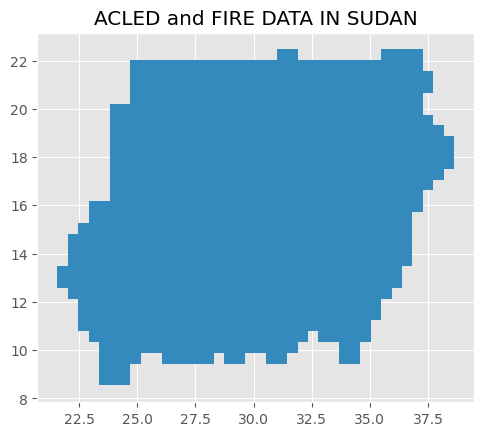

In [100]:
#Plotting the data
gdf.plot()
plt.title('ACLED and FIRE DATA IN SUDAN')
plt.show()

In [383]:
# Assuming 'gdf' is your GeoDataFrame
gdf.to_file('firms_acled_gdf.shp')

In [384]:
gdf.to_file('firms_acled_gdf.geojson', driver='GeoJSON')

In [101]:
print(gdf.crs)
print(gdf.geometry_fire.head())

EPSG:4326
0    POLYGON ((21.55957 12.57641, 22.00872 12.57641...
1    POLYGON ((21.55957 12.57641, 22.00872 12.57641...
2    POLYGON ((21.55957 12.57641, 22.00872 12.57641...
3    POLYGON ((21.55957 12.57641, 22.00872 12.57641...
4    POLYGON ((21.55957 12.57641, 22.00872 12.57641...
Name: geometry_fire, dtype: geometry


In [102]:
gdf['geometry_fire'] = gdf['geometry_fire'].buffer(0)

In [103]:
gdf.sample()

,grid_id,year,fireCount,acled_count,geometry_fire
7628,"62,44",2020,0,0,"POLYGON ((27.84777 19.76294, 27.84777 20.21209..."


In [104]:
gdf.shape

(20400, 5)

In [106]:
#plot_year = 2001
def print_plot(plot_year):    
    # Check if the GeoDataFrame is empty
    if gdf.empty:
        print("The GeoDataFrame is empty. Please check your data.")
    else:
        # Create the plot
        fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    
        # Plot the Fire counts
        gdf[gdf['year'] == plot_year].plot(column='fireCount', 
                 ax=ax[0], 
                 legend=True, 
                 legend_kwds={'label': 'Fire Count', 'orientation': 'horizontal'},
                 cmap='cool',  # You can change this to another colormap if you prefer
                 missing_kwds={'color': 'lightgrey'},
                 edgecolor='grey',
                 linewidth=0.5)
        
        # Plot the ACLED counts
        gdf[gdf['year'] == plot_year].plot(column='acled_count', 
                 ax=ax[1], 
                 legend=True, 
                 legend_kwds={'label': 'ACLED Count', 'orientation': 'horizontal'},
                 cmap='summer',  # You can change this to another colormap if you prefer
                 missing_kwds={'color': 'lightgrey'},
                 edgecolor='grey',
                 linewidth=0.5)
    
        # Add a title
        #plt.title('ACLED Counts by Grid', fontsize=16, loc = 'center')
        # Add a main title for the entire figure
        plt.suptitle(f'Fire and ACLED Count: {plot_year}', fontsize=16)
    
        # Remove axes
        for a in ax:
            a.axis('off')
    
        # Set the extent of the plot to the bounds of the data
        for a in ax:
            a.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
            a.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])
    
        # Adjust layout and save
        plt.tight_layout()
        plt.savefig(f'acled_counts_map_{plot_year}.png', dpi=300, bbox_inches='tight')
        
        #print("ACLED counts map saved as 'acled_counts_map.png'")
    
        # Display the plot (optional - remove if you don't want to display it)
        plt.show()
    
    # Print some information about the GeoDataFrame
    #print(f"Number of rows: {len(gdf)}")
    #print(f"Columns: {gdf.columns}")
    #print(f"CRS: {gdf.crs}")
    #print(f"Geometry type: {gdf.geometry_fire.geom_type.value_counts()}")
    #print(f"Bounding box: {gdf.total_bounds}")
    #print(f"ACLED count range: {gdf['acled_count'].min()} to {gdf['acled_count'].max()}")

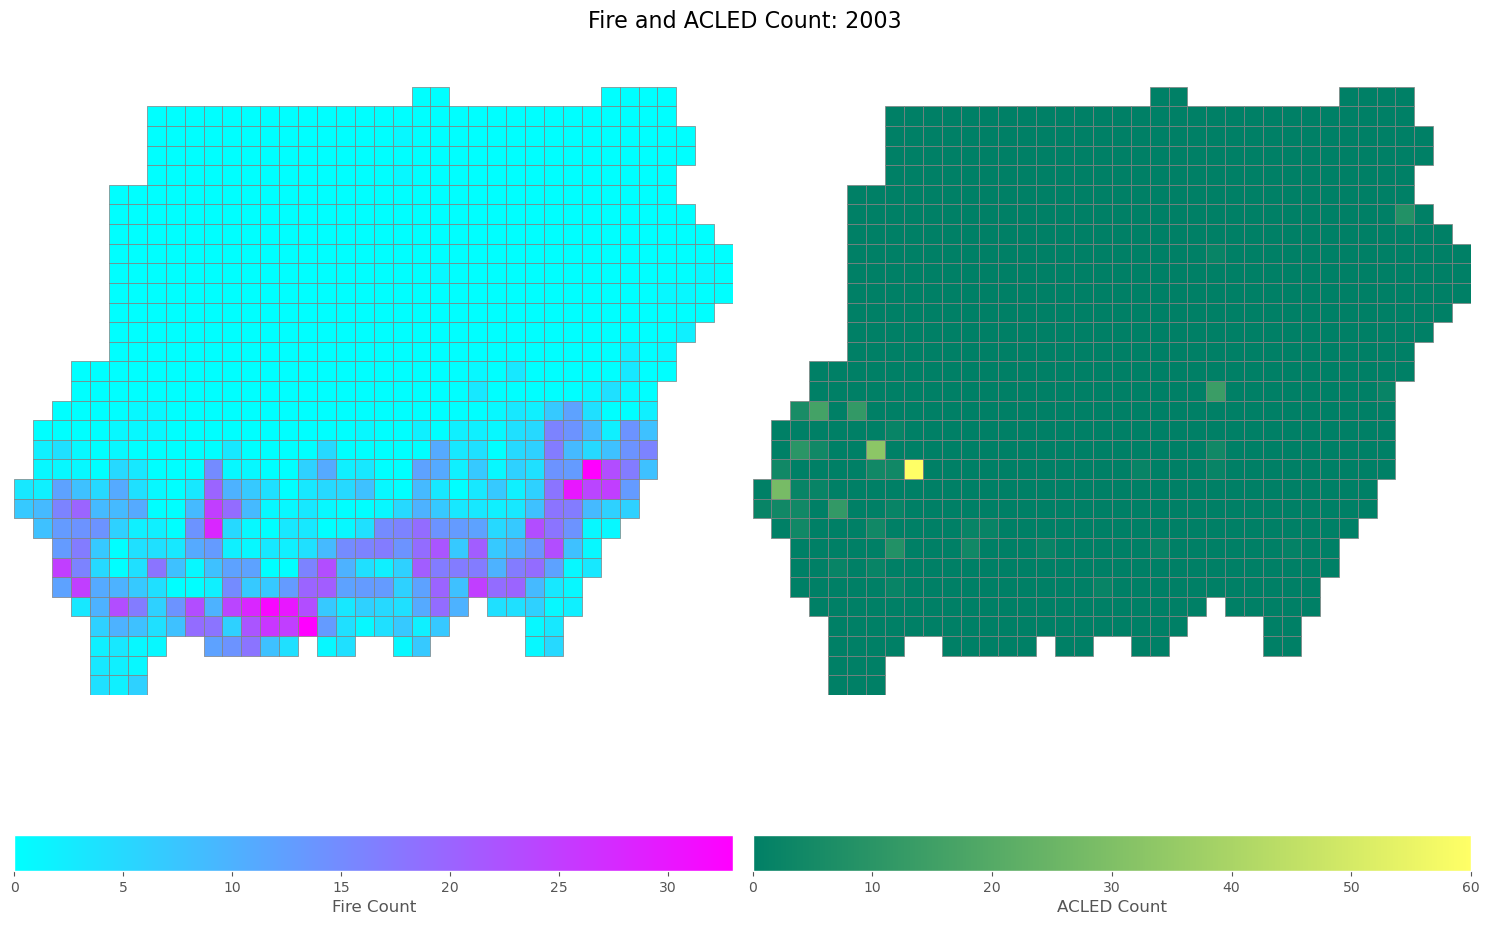

In [107]:
for year in [2003]:
    print_plot(year)

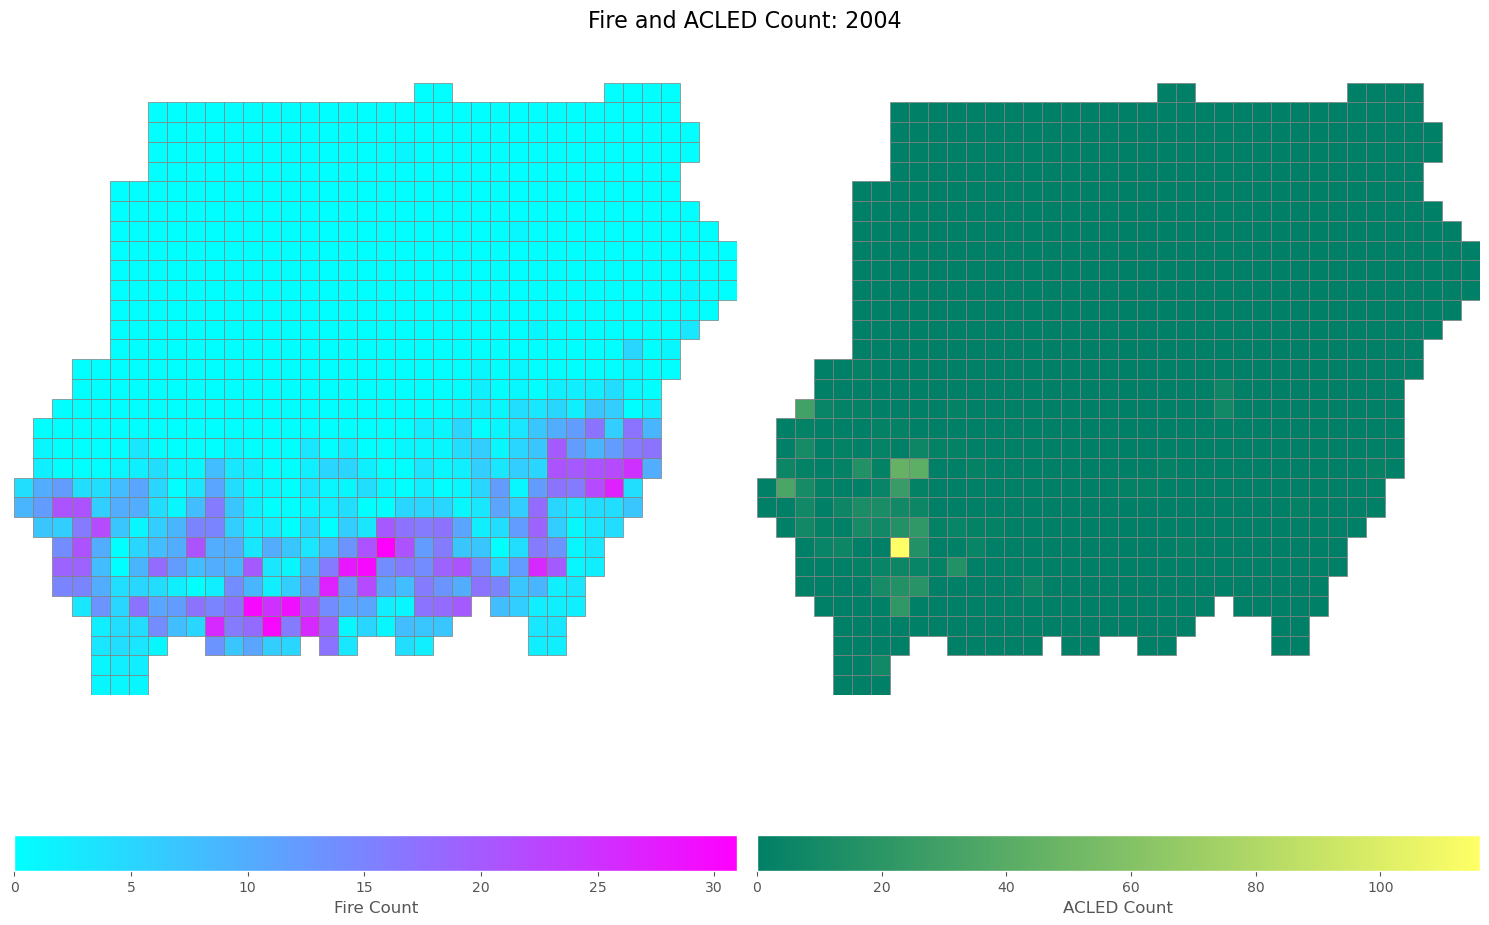

In [108]:
for year in [2004]:
    print_plot(year)

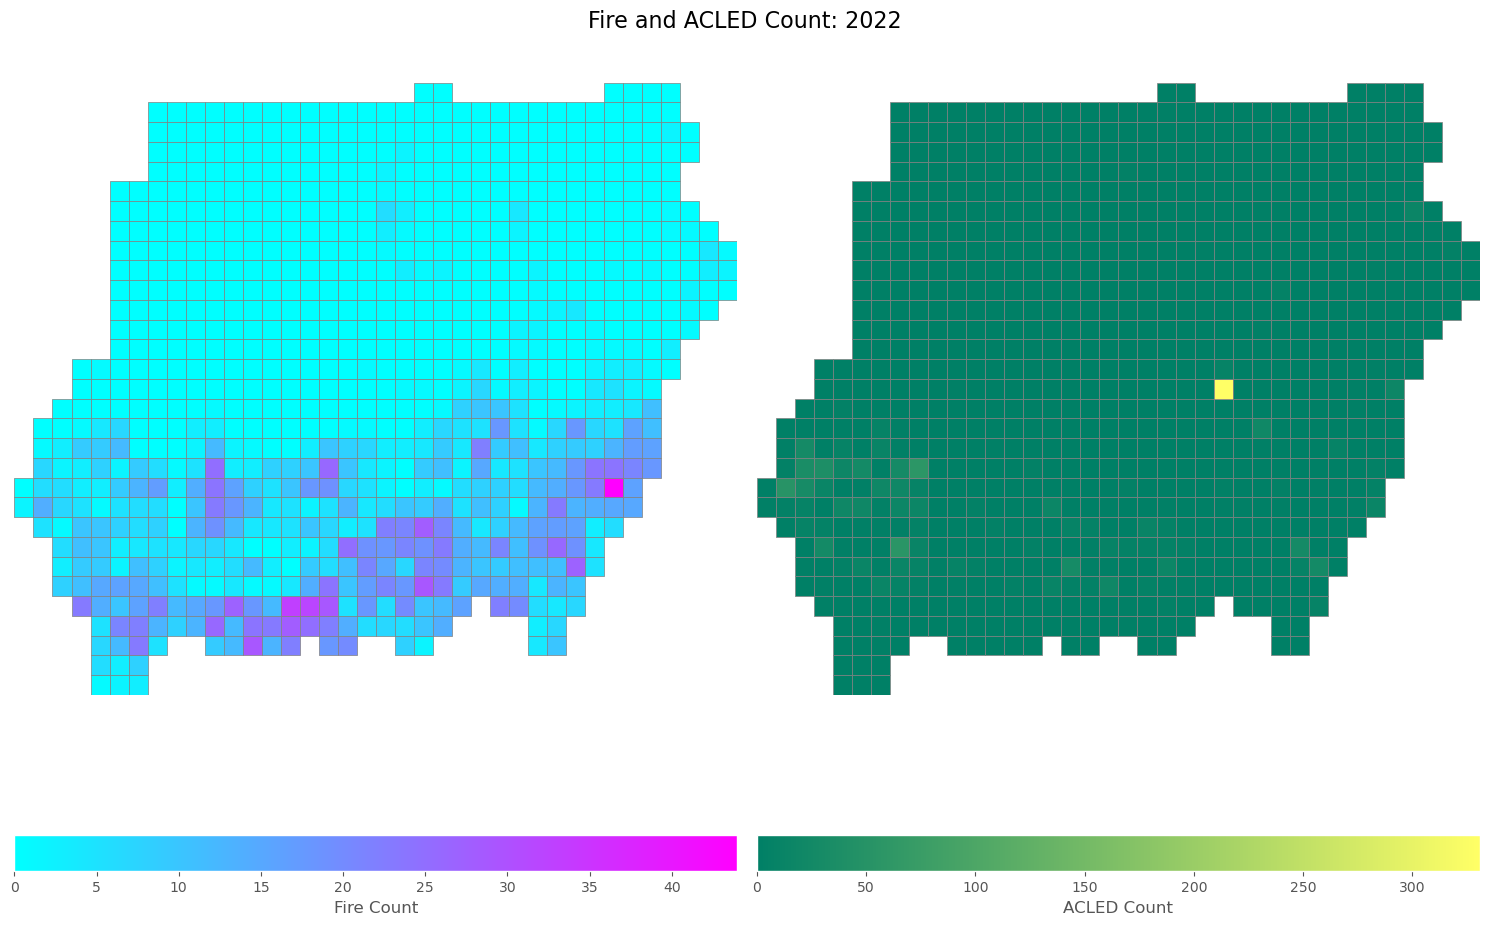

In [392]:
for year in [2022]:
    print_plot(year)

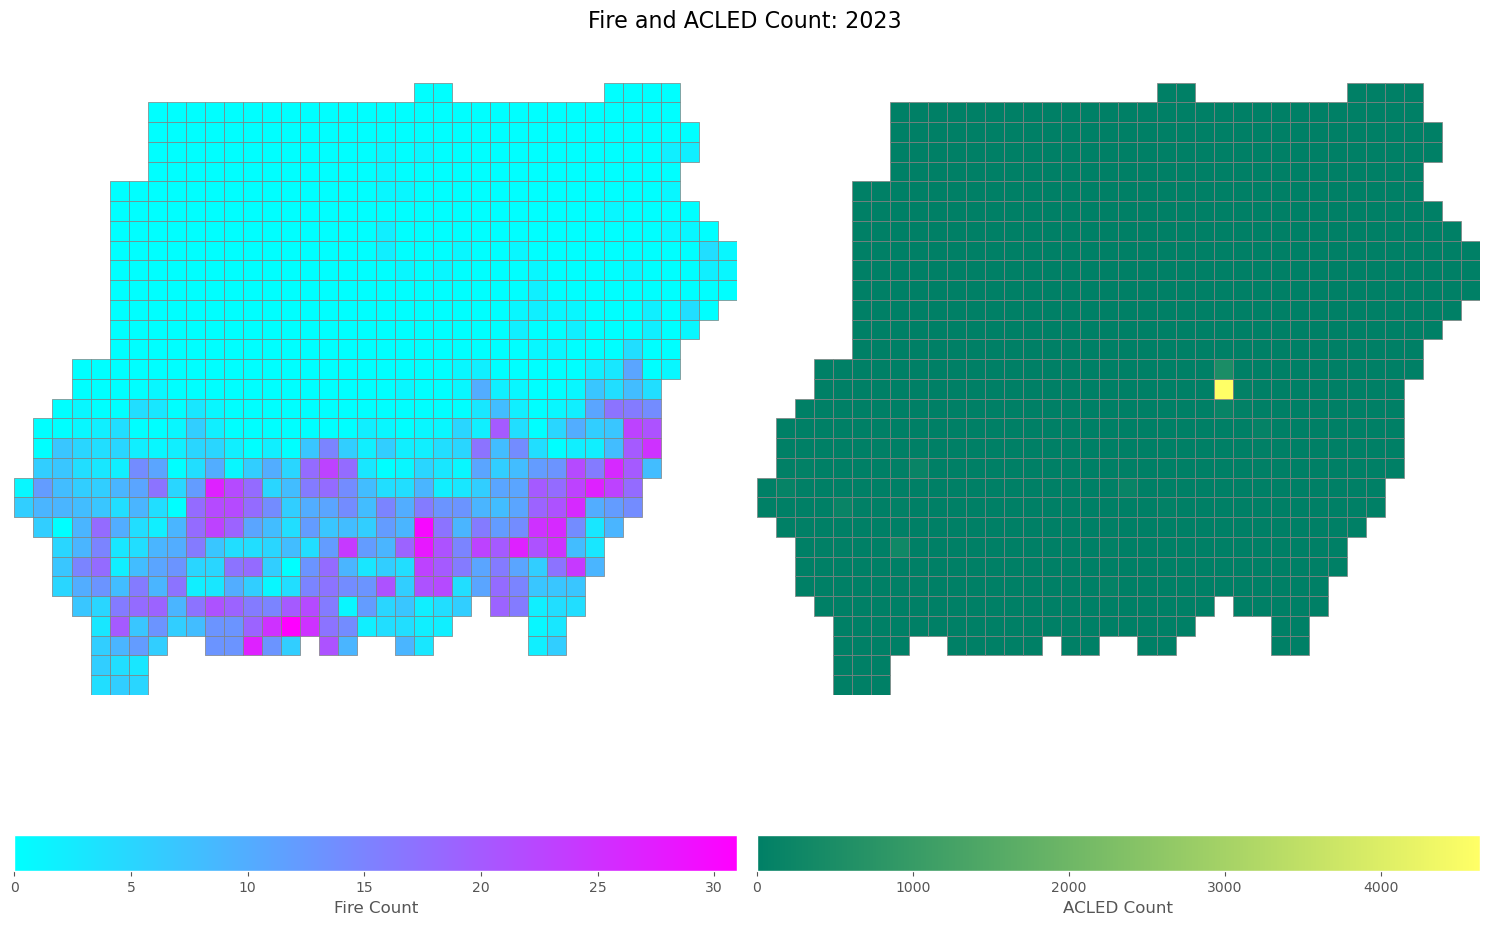

In [393]:
for year in [2023]:
    print_plot(year)

In [109]:
# Create a copy of the GeoDataFrame to avoid changing the original data
gdf_copy = gdf.copy()

In [110]:
#plot_year = 2001
def print_plot_0(plot_year):    
    # Check if the GeoDataFrame is empty
    if gdf_copy.empty:
        print("The GeoDataFrame is empty. Please check your data.")
    else:
        # Create the plot
        fig, ax = plt.subplots(1, 2, figsize=(15, 10))

        # Set fireCount and acled_count to NaN where values are 0
        gdf_copy['fireCount'] = gdf_copy['fireCount'].replace(0, np.nan)
        gdf_copy['acled_count'] = gdf_copy['acled_count'].replace(0, np.nan)
    
        # Plot the Fire counts
        gdf_copy[gdf_copy['year'] == plot_year].plot(column='fireCount', 
                 ax=ax[0], 
                 legend=True, 
                 legend_kwds={'label': 'Fire Count', 'orientation': 'horizontal'},
                 cmap='cool',  # You can change this to another colormap if you prefer
                 missing_kwds={'color': 'white'},
                 edgecolor='grey',
                 linewidth=0.5)
        
        # Plot the ACLED counts
        gdf_copy[gdf_copy['year'] == plot_year].plot(column='acled_count', 
                 ax=ax[1], 
                 legend=True, 
                 legend_kwds={'label': 'ACLED Count', 'orientation': 'horizontal'},
                 cmap='summer',  # You can change this to another colormap if you prefer
                 missing_kwds={'color': 'white'},
                 edgecolor='grey',
                 linewidth=0.5)
    
        # Add a title
        #plt.title('ACLED Counts by Grid', fontsize=16, loc = 'center')
        # Add a main title for the entire figure
        plt.suptitle(f'Fire and ACLED Count: {plot_year}', fontsize=16)
    
        # Remove axes
        for a in ax:
            a.axis('off')
    
        # Set the extent of the plot to the bounds of the data
        for a in ax:
            a.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
            a.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])
    
        # Adjust layout and save
        plt.tight_layout()
        plt.savefig(f'acled_counts_map_{plot_year}_0.png', dpi=300, bbox_inches='tight')
        
        #print("ACLED counts map saved as 'acled_counts_map.png'")
    
        # Display the plot (optional - remove if you don't want to display it)
        plt.show()
    
    # Print some information about the GeoDataFrame
    #print(f"Number of rows: {len(gdf)}")
    #print(f"Columns: {gdf.columns}")
    #print(f"CRS: {gdf.crs}")
    #print(f"Geometry type: {gdf.geometry_fire.geom_type.value_counts()}")
    #print(f"Bounding box: {gdf.total_bounds}")
    #print(f"ACLED count range: {gdf['acled_count'].min()} to {gdf['acled_count'].max()}")

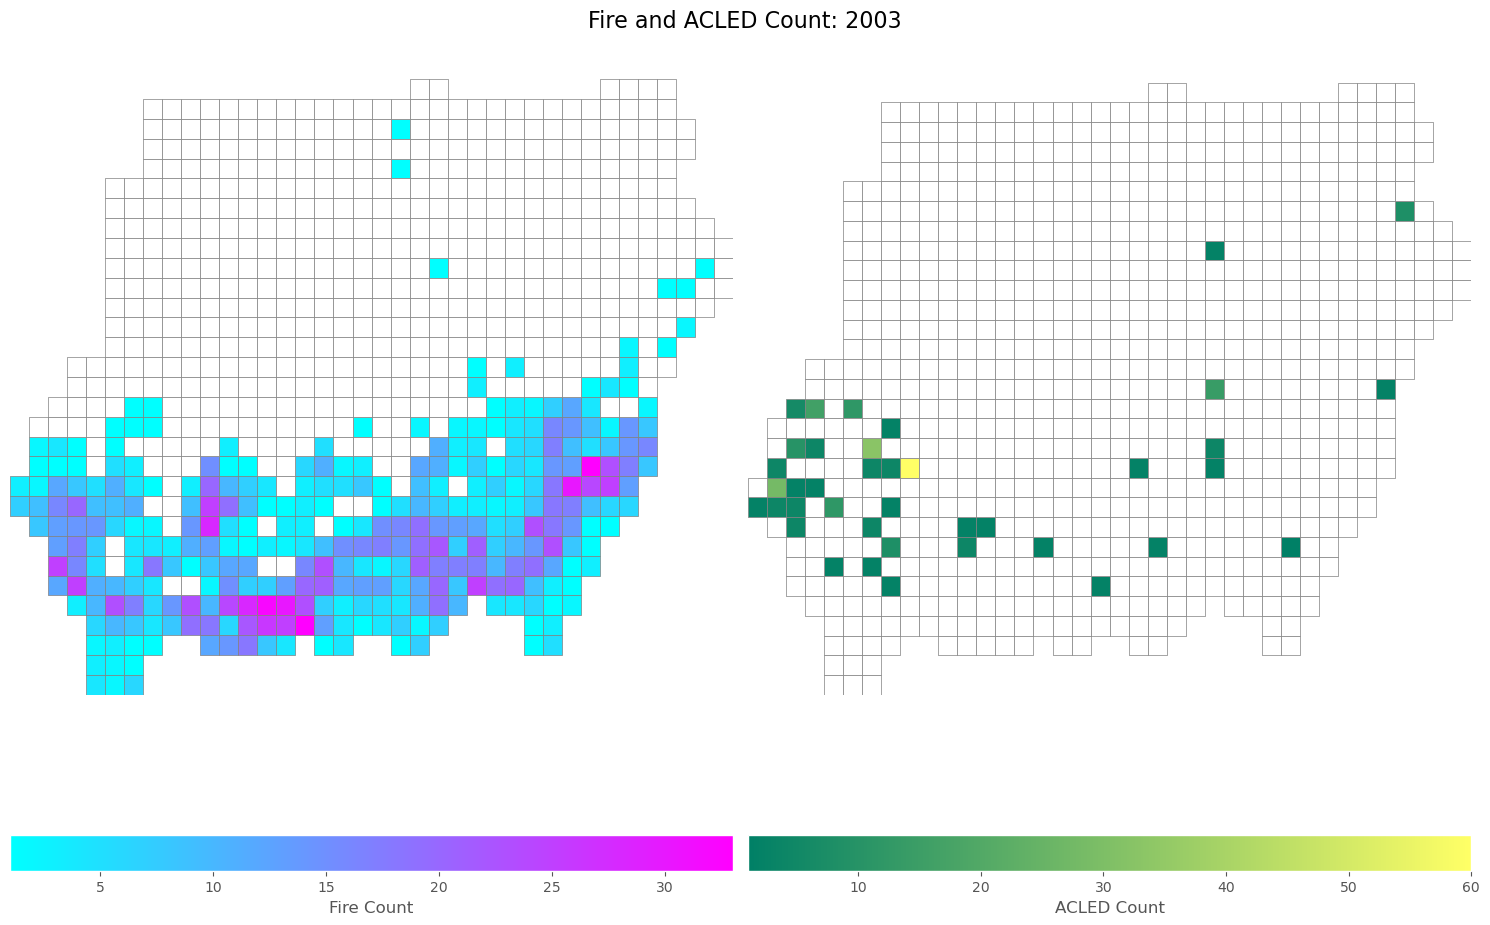

In [111]:
for year in [2003]:
    print_plot_0(year)

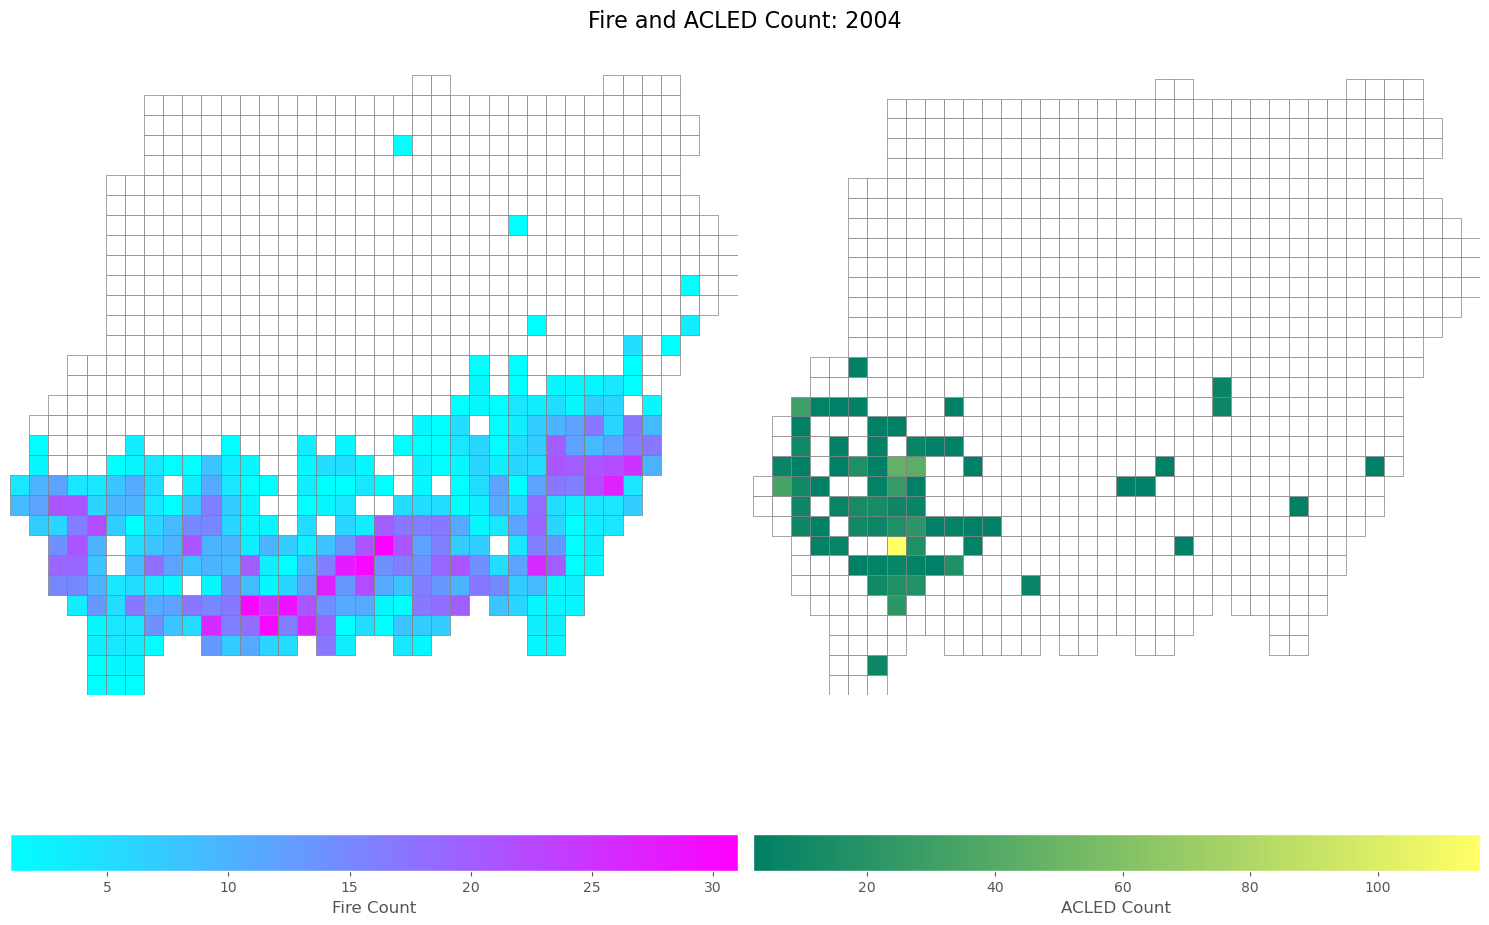

In [112]:
for year in [2004]:
    print_plot_0(year)

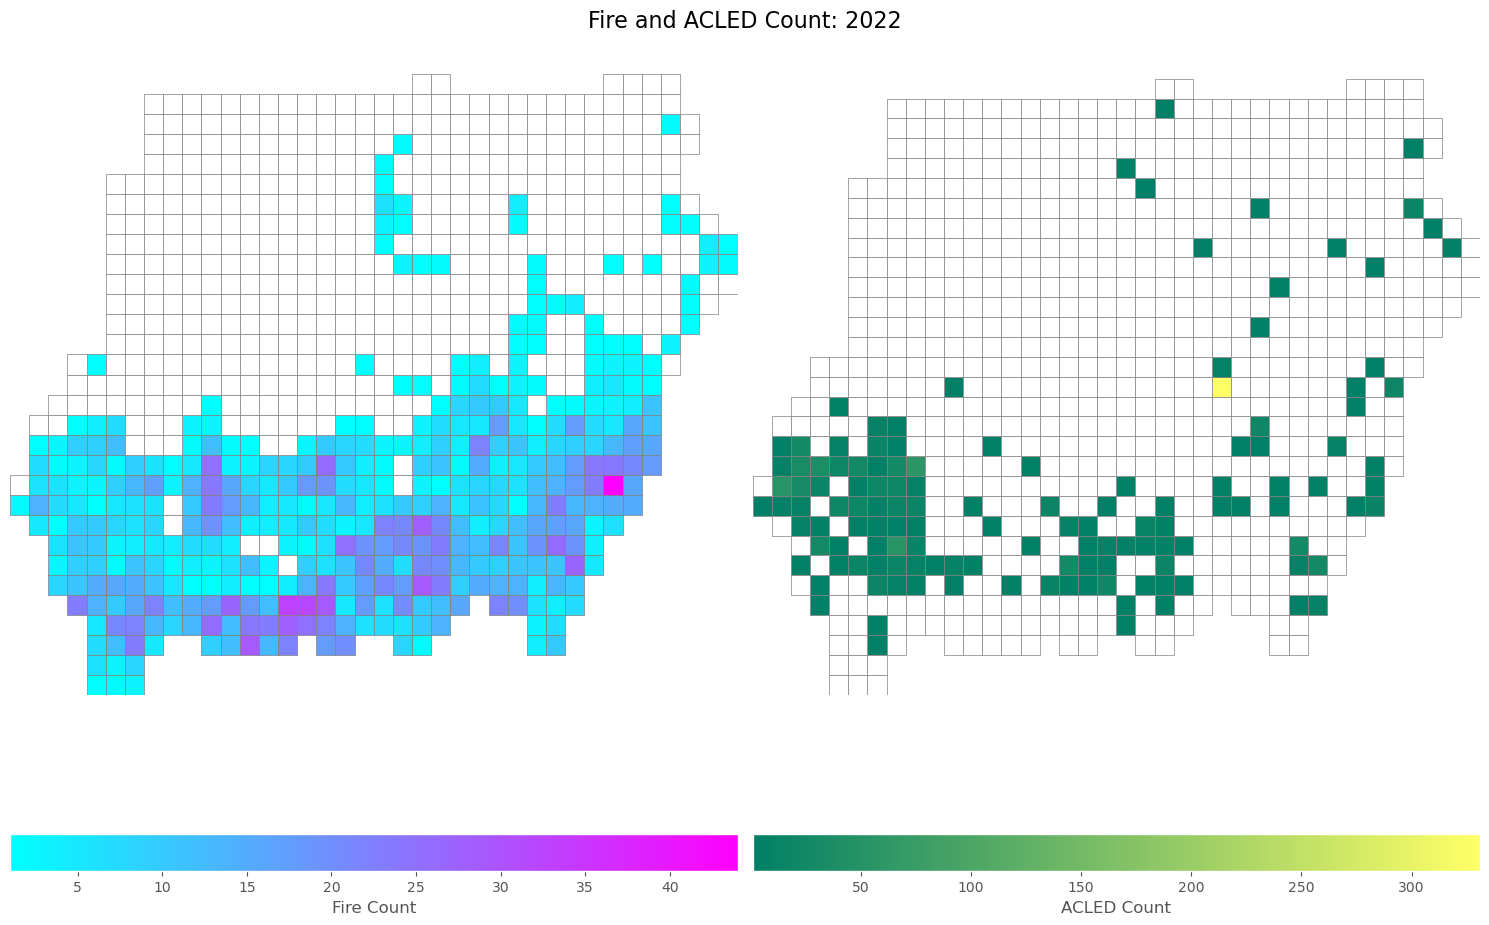

In [401]:
for year in [2022]:
    print_plot_0(year)

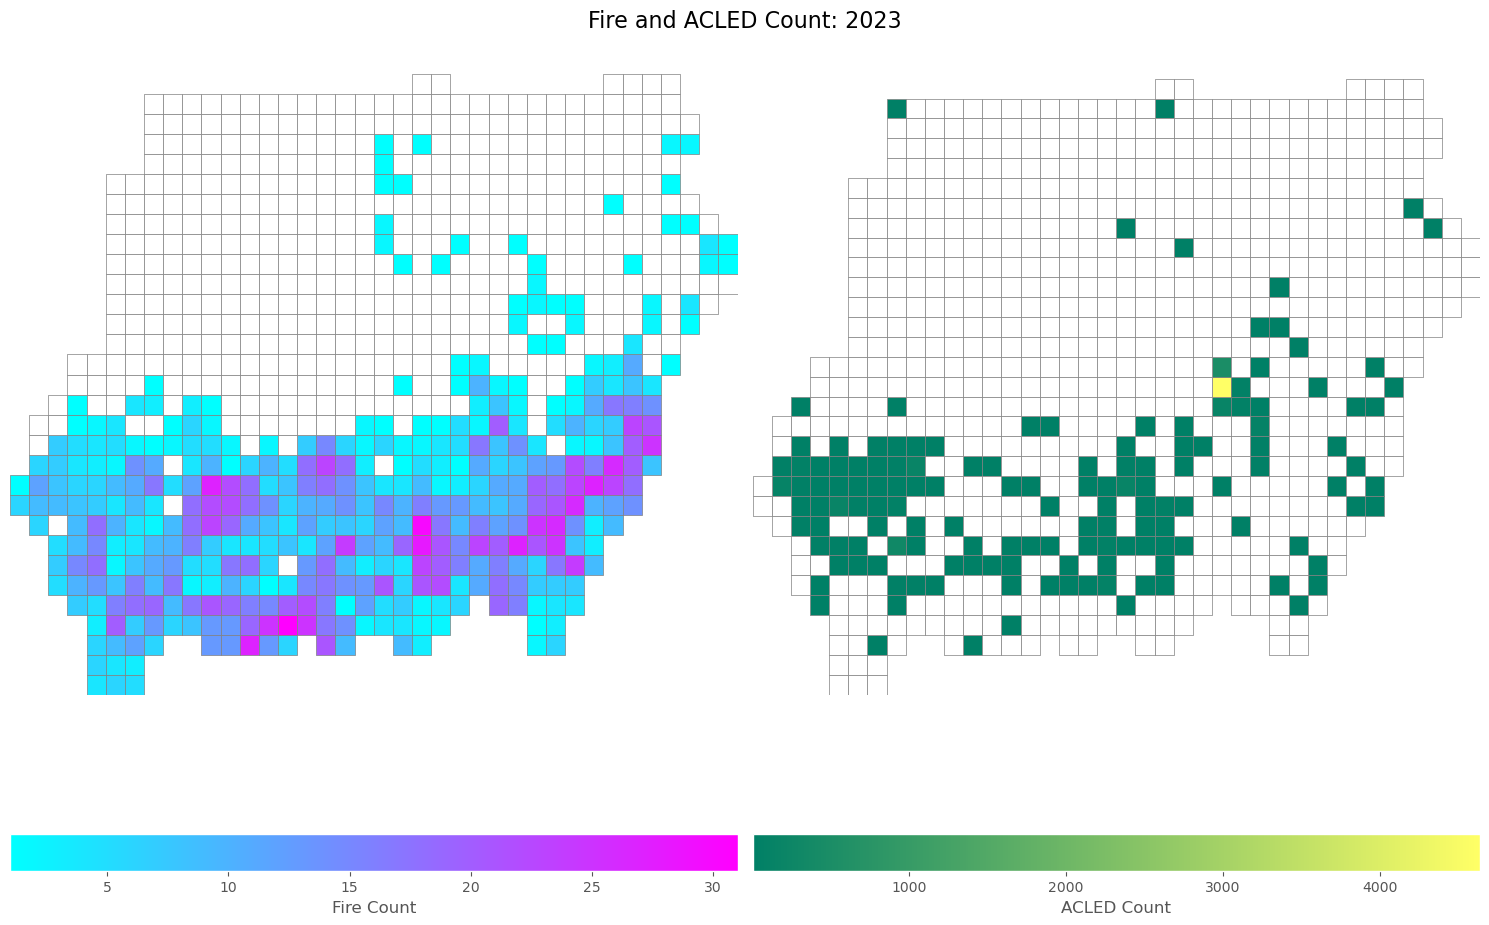

In [402]:
for year in [2023]:
    print_plot_0(year)

## Interactive Map

In [133]:
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

# Assuming your geodataframe is named 'gdf'

# Convert the GeoDataFrame to WGS84 coordinate system if it's not already
gdf = gdf.to_crs(epsg=4326)

# Calculate the center of the map
center_lat = gdf.geometry_fire.centroid.y.mean()
center_lon = gdf.geometry_fire.centroid.x.mean()

# Create a map
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Create colormaps
fire_colormap = LinearColormap(colors=['yellow', 'orange', 'red'], vmin=gdf['fireCount'].min(), vmax=gdf['fireCount'].max())
acled_colormap = LinearColormap(colors=['lightblue', 'blue', 'darkblue'], vmin=gdf['acled_count'].min(), vmax=gdf['acled_count'].max())

# Add polygons to the map
for idx, row in gdf.iterrows():
    fire_color = fire_colormap(row['fireCount'])
    acled_color = acled_colormap(row['acled_count'])
    
    folium.GeoJson(
        row['geometry_fire'],
        style_function=lambda x, fire_color=fire_color, acled_color=acled_color: {
            'fillColor': fire_color,
            'color': acled_color,
            'weight': 2,
            'fillOpacity': 0.7
        },
        tooltip=f"Fire Count: {row['fireCount']}, ACLED Count: {row['acled_count']}"
    ).add_to(m)

# Add color scales to the map
fire_colormap.add_to(m)
acled_colormap.add_to(m)

# Save the map
m.save('interactive_map.html')

print("Interactive map saved as 'interactive_map.html'")

Interactive map saved as 'interactive_map.html'


**Checking the Descriptive statistics of all the Numerical Column**

In [407]:
#merged_df.fireCount.describe()

In [408]:
# merged_df.acled_count.describe()

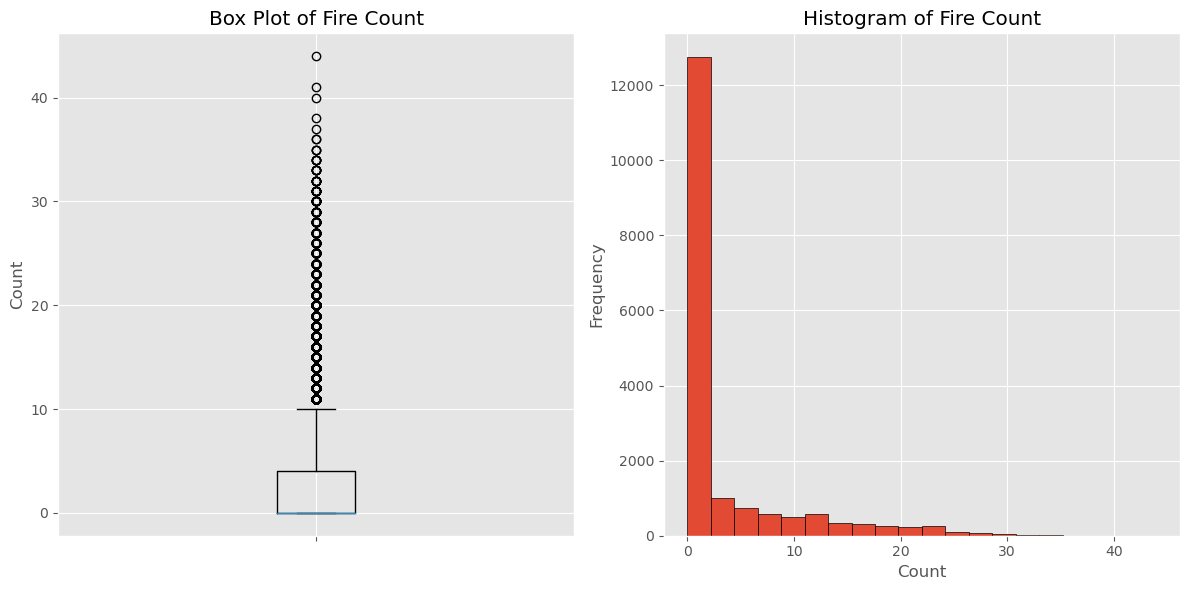

In [145]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot
axs[0].boxplot(merged_df['fireCount'])
axs[0].set_title('Box Plot of Fire Count')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels([''])

# Plot a histogram
axs[1].hist(merged_df['fireCount'], bins=20, edgecolor='black')
axs[1].set_title('Histogram of Fire Count')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

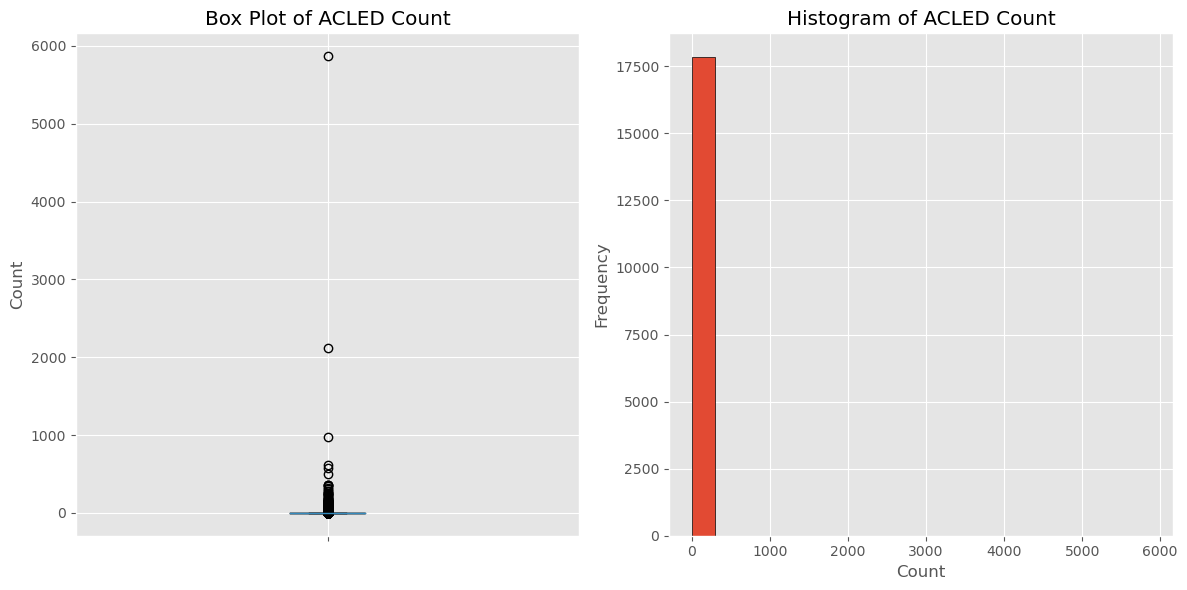

In [142]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot
axs[0].boxplot(merged_df['acled_count'])
axs[0].set_title('Box Plot of ACLED Count')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels([''])

# Plot a histogram
axs[1].hist(merged_df['acled_count'], bins=20, edgecolor='black')
axs[1].set_title('Histogram of ACLED Count')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**As we have got a complete Panel data we want to see what relationship exist between No. of Fires and ACLED event in a particular Year in a particular grid cell.**

In [147]:
# correlation = merged_df['fireCount'].corr(merged_df['acled_count'])
# print(f"Overall correlation between fire counts and ACLED events: {correlation}")

# # Correlation by year
# yearly_correlation = merged_df.groupby('year').apply(lambda x: x['fireCount'].corr(x['acled_count']))
# print("Correlation by year:")
# print(yearly_correlation)

Overall correlation between fire counts and ACLED events: 0.02700227474487936
Correlation by year:
year
2004                                     0.0574
2005                                     0.0194
2006                                     0.0309
2007                                     0.0647
2008                                     0.0324
2009                                     0.0316
2010                                     0.0041
2011                                     0.0968
2012                                     0.0809
2013                                     0.0830
2014                                     0.0633
2015                                     0.0895
2016                                     0.1245
2017                                     0.0497
2018                                     0.0762
2019                                     0.0570
2020                                     0.0824
2021                                     0.1174
2022                            

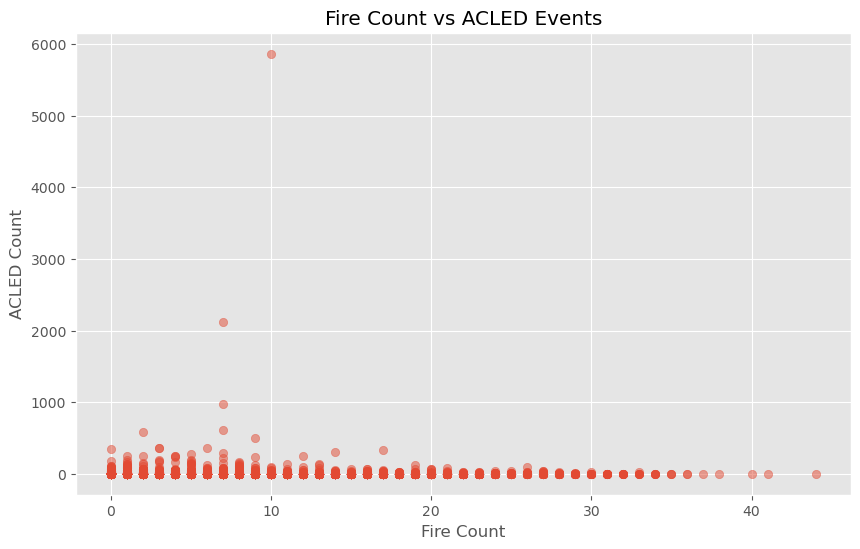

In [148]:
# plt.figure(figsize=(10, 6))
# plt.scatter(merged_df['fireCount'], merged_df['acled_count'], alpha=0.5)
# plt.xlabel('Fire Count')
# plt.ylabel('ACLED Count')
# plt.title('Fire Count vs ACLED Events')
# plt.show()

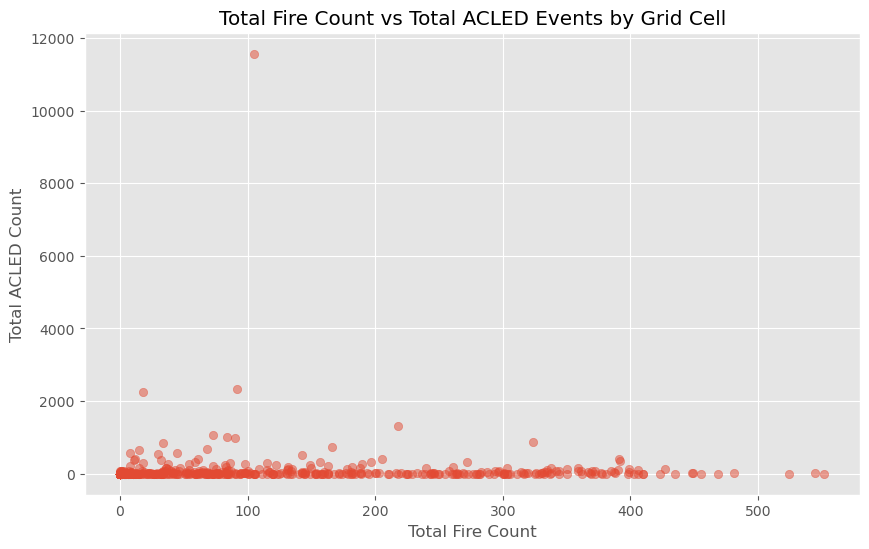

In [147]:
# grid_data = merged_df.groupby('grid_id').agg({'fireCount': 'sum', 'acled_count': 'sum'}).reset_index()

# plt.figure(figsize=(10, 6))
# plt.scatter(grid_data['fireCount'], grid_data['acled_count'], alpha=0.5)
# plt.xlabel('Total Fire Count')
# plt.ylabel('Total ACLED Count')
# plt.title('Total Fire Count vs Total ACLED Events by Grid Cell')
# plt.show()

**Here we are looking at 18 Years of Data for Sudan which consist of Fire data and Acled Conflict Data. 
Now we want to know which year has maximum fire Count and ACLED Count**

In [149]:
# Extract year from 'id_year' column
# gdf['year'] = gdf['grid_id'].astype(str).str[-4:].astype(int)

# Group by year and sum the counts
yearly_counts = gdf.groupby('year').agg({
    'fireCount': 'sum',
    'acled_count': 'sum'
}).reset_index()

# Find the year with maximum fire counts
max_fire_year = yearly_counts.loc[yearly_counts['fireCount'].idxmax()]

# Find the year with maximum ACLED counts
max_acled_year = yearly_counts.loc[yearly_counts['acled_count'].idxmax()]

# Print the results
print("Year with maximum fire counts:")
print(f"Year: {max_fire_year['year']}")
print(f"Total fire count: {max_fire_year['fireCount']}")
print("\n")

print("Year with maximum ACLED counts:")
print(f"Year: {max_acled_year['year']}")
print(f"Total ACLED count: {max_acled_year['acled_count']}")

# If you want to see the counts for all years
print("\nYearly counts:")
print(yearly_counts.sort_values('year'))

Year with maximum fire counts:
Year: 2023
Total fire count: 3701


Year with maximum ACLED counts:
Year: 2023
Total ACLED count: 11068

Yearly counts:
    year  fireCount  acled_count
0   2004       2740          961
1   2005       2331          560
2   2006       2600          288
3   2007       2841          222
4   2008       3044          428
5   2009       2849          277
6   2010       2609          220
7   2011       2242          340
8   2012       2235         1377
9   2013       2869         1946
10  2014       2419         2464
11  2015       2443         2493
12  2016       2324         2528
13  2017       2442         1460
14  2018       2758         1357
15  2019       3016         2241
16  2020       3315         1493
17  2021       3434         2374
18  2022       3690         3796
19  2023       3701        11068
20  2024       3530         5762


**We see that Year 2023 has the maximum fire count and ACLED count which is the year of Conflict**

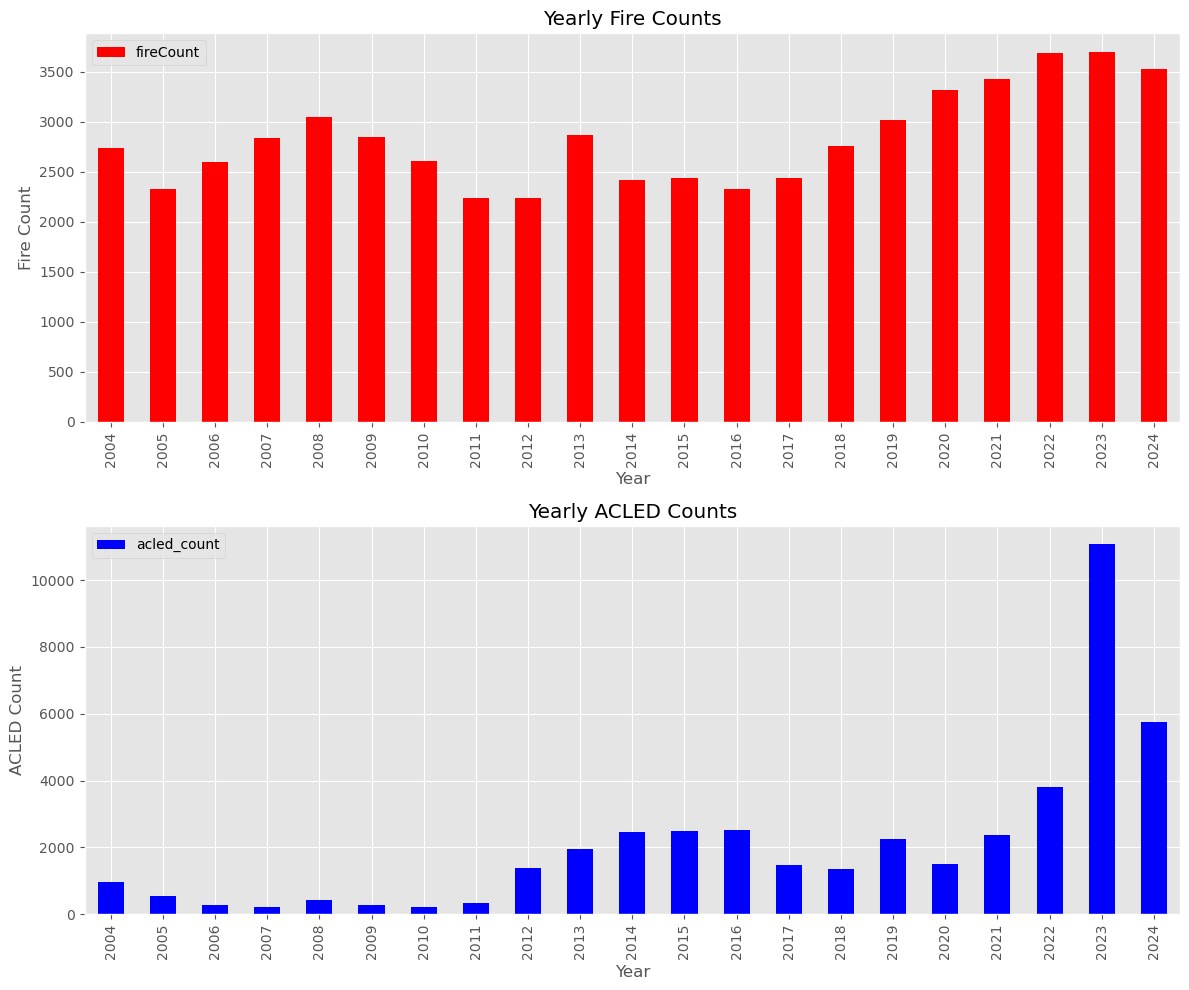

In [150]:
# Create a bar plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

yearly_counts.plot(x='year', y='fireCount', kind='bar', ax=ax1, color='red')
ax1.set_title('Yearly Fire Counts')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fire Count')

yearly_counts.plot(x='year', y='acled_count', kind='bar', ax=ax2, color='blue')
ax2.set_title('Yearly ACLED Counts')
ax2.set_xlabel('Year')
ax2.set_ylabel('ACLED Count')

# Save the figure
plt.savefig('FIRE_counts_BAR_Plot.png', dpi=300, bbox_inches='tight')
plt.savefig('ACLED_counts_BAR_Plot.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

**AGGREGATION BY GRID_ID**

In [151]:
grid_year_agg = merged_df.groupby(['grid_id', 'year']).agg({
    'fireCount': 'sum',
    'acled_count': 'sum'
}).reset_index()

print(grid_year_agg.head(21))

   grid_id  year  fireCount  acled_count
0    48,28  2004          9            0
1    48,28  2005          4            0
2    48,28  2006          4            0
3    48,28  2007          3            0
4    48,28  2008          2            0
5    48,28  2009          1            0
6    48,28  2010          2            0
7    48,28  2011          2            0
8    48,28  2012          2            0
9    48,28  2013          0            0
10   48,28  2014          0            0
11   48,28  2015          3            0
12   48,28  2016          0            0
13   48,28  2017          2            0
14   48,28  2018          1            0
15   48,28  2019          4            0
16   48,28  2020          7            2
17   48,28  2021          6            4
18   48,28  2022          2            4
19   48,28  2023          6            2
20   48,28  2024          2            0


In [153]:
# import statsmodels.api as sm
# from statsmodels.regression.mixed_linear_model import MixedLM

# # Prepare the data
# gdf['constant'] = 1
# gdf = gdf.sort_values(['grid_id', 'year'])

# # Fit a mixed linear model
# model = MixedLM.from_formula("fireCount ~ acled_count + year", data=gdf, groups="grid_id")
# results = model.fit()

# print(results.summary())

           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  fireCount  
No. Observations:  17850    Method:              REML       
No. Groups:        850      Scale:               9.2375     
Min. group size:   21       Log-Likelihood:      -46976.9585
Max. group size:   21       Converged:           Yes        
Mean group size:   21.0                                     
------------------------------------------------------------
             Coef.   Std.Err.    z    P>|z|  [0.025   0.975]
------------------------------------------------------------
Intercept   -108.315    7.576 -14.298 0.000 -123.163 -93.467
acled_count    0.001    0.001   2.135 0.033    0.000   0.002
year           0.055    0.004  14.741 0.000    0.048   0.063
grid_id Var   29.637    0.492                               



In [155]:
merged_df

,grid_id,year,fireCount,acled_count,geometry_fire
0,"48,28",2004,9,0,POLYGON ((21.559566818868515 12.57641397767330...
1,"48,29",2004,4,2,POLYGON ((21.559566818868515 13.02557161973306...
2,"49,27",2004,7,0,POLYGON ((22.008724460928274 12.12725633561354...
3,"49,28",2004,12,0,POLYGON ((22.008724460928274 12.57641397767330...
4,"49,29",2004,10,50,POLYGON ((22.008724460928274 13.02557161973306...
...,...,...,...,...,...
17845,"84,41",2024,2,0,"POLYGON ((37.7292419330199 18.41546332445019, ..."
17846,"84,42",2024,0,0,"POLYGON ((37.7292419330199 18.86462096650995, ..."
17847,"85,39",2024,0,0,POLYGON ((38.17839957507966 17.517148040330667...
17848,"85,40",2024,0,0,POLYGON ((38.17839957507966 17.966305682390427...


In [156]:
gdf

,grid_id,year,fireCount,acled_count,geometry_fire,constant
0,"48,28",2004,9,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
850,"48,28",2005,4,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
1700,"48,28",2006,4,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
2550,"48,28",2007,3,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
3400,"48,28",2008,2,0,"POLYGON ((21.55957 12.57641, 21.55957 13.02557...",1
...,...,...,...,...,...,...
14449,"85,41",2020,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1
15299,"85,41",2021,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1
16149,"85,41",2022,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1
16999,"85,41",2023,1,0,"POLYGON ((38.17840 18.41546, 38.17840 18.86462...",1


Converting the ACLED Count into binary 0 with no events and 1 with more than one event

In [159]:
merged_df

,grid_id,year,fireCount,acled_count,geometry_fire,acled_binary,constant
0,"48,28",2004,9,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
850,"48,28",2005,4,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
1700,"48,28",2006,4,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
2550,"48,28",2007,3,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
3400,"48,28",2008,2,0,POLYGON ((21.559566818868515 12.57641397767330...,0,1
...,...,...,...,...,...,...,...
14449,"85,41",2020,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1
15299,"85,41",2021,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1
16149,"85,41",2022,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1
16999,"85,41",2023,1,0,"POLYGON ((38.17839957507966 18.41546332445019,...",0,1


In [168]:
top_fire_cells = grid_year_agg.nlargest(10, 'fireCount')
top_acled_cells = grid_year_agg.nlargest(10, 'acled_count')

print("Top 10 Grid Cell-Year Combinations by Fire Count:")
print(top_fire_cells[['grid_id', 'year', 'fireCount', 'acled_count']])

print("\nTop 10 Grid Cell-Year Combinations by ACLED Count:")
print(top_acled_cells[['grid_id', 'year', 'fireCount', 'acled_count']])

Top 10 Grid Cell-Year Combinations by Fire Count:
      grid_id  year  fireCount  acled_count
15873   79,29  2022         44            0
3954    58,27  2010         41            0
6217    62,23  2005         40            0
6205    62,22  2014         38            0
13649   75,23  2024         37            0
6220    62,23  2008         36            0
6778    63,22  2020         36            0
5631    61,23  2007         35            0
6218    62,23  2006         35            0
16799   81,31  2024         35            0

Top 10 Grid Cell-Year Combinations by ACLED Count:
      grid_id  year  fireCount  acled_count
12199   72,34  2023         10         5867
12200   72,34  2024          7         2121
12198   72,34  2022          7          976
12195   72,34  2019          7          611
12220   72,35  2023          2          579
2224    55,26  2023          9          505
2876    56,30  2024          3          361
12197   72,34  2021          6          356
13250   74,32  202

**TIME SERIES FOR SPECIFIC GRID CELL**

Each cell in the heatmap represents the correlation between fires in the year on the y-axis and ACLED events in the year on the x-axis. The color indicates the strength and direction of the correlation:

Red colors indicate positive correlations (more fires associated with more ACLED events)
Blue colors indicate negative correlations (more fires associated with fewer ACLED events)
White or light colors indicate little to no correlation

Making a claim about Anomolous fire and those fires that are conflict induced. Calculating mean value of fire and standard deviation within each grid cell

In [179]:
# Finding the GridId with maximum fire and Acled Count

# Find the grid_id with the maximum fire count
max_fire_grid = gdf.loc[gdf['fireCount'].idxmax()]

# Find the grid_id with the maximum ACLED count
max_acled_grid = gdf.loc[gdf['acled_count'].idxmax()]

# Print the results
print("Grid with maximum fire count:")
print(f"Grid ID: {max_fire_grid['grid_id']}")
print(f"Fire count: {max_fire_grid['fireCount']}")
print(f"Year: {max_fire_grid['year']}")
print(f"Geometry: {max_fire_grid['geometry_fire']}")
print("\n")

print("Grid with maximum ACLED count:")
print(f"Grid ID: {max_acled_grid['grid_id']}")
print(f"ACLED count: {max_acled_grid['acled_count']}")
print(f"Year: {max_acled_grid['year']}")
print(f"Geometry: {max_acled_grid['geometry_fire']}")

# If you want to find the top N grids for each category:
n = 5  # Change this to however many top grids you want to see

print(f"\nTop {n} grids with highest fire count:")
print(gdf.nlargest(n, 'fireCount')[['grid_id', 'year', 'fireCount', 'geometry_fire']])

print(f"\nTop {n} grids with highest ACLED count:")
print(gdf.nlargest(n, 'acled_count')[['grid_id', 'year', 'acled_count', 'geometry_fire']])

Grid with maximum fire count:
Grid ID: 79,29
Fire count: 44
Year: 2022
Geometry: POLYGON ((35.483453722721094 13.02557161973306, 35.483453722721094 13.474729261792822, 35.932611364780854 13.474729261792822, 35.932611364780854 13.02557161973306, 35.483453722721094 13.02557161973306))


Grid with maximum ACLED count:
Grid ID: 72,34
ACLED count: 5867
Year: 2023
Geometry: POLYGON ((32.33935022830277 15.271359830031864, 32.33935022830277 15.720517472091625, 32.78850787036253 15.720517472091625, 32.78850787036253 15.271359830031864, 32.33935022830277 15.271359830031864))

Top 5 grids with highest fire count:
      grid_id  year  fireCount  \
16055   79,29  2022         44   
5288    58,27  2010         41   
1146    62,23  2005         40   
8795    62,22  2014         38   
17649   75,23  2024         37   

                                           geometry_fire  
16055  POLYGON ((35.48345 13.02557, 35.48345 13.47473...  
5288   POLYGON ((26.05114 12.12726, 26.05114 12.57641...  
1146   P

In [180]:
# # Get the top 5 grids for each category
# top_fire_grids = gdf.nlargest(5, 'fireCount')
# top_acled_grids = gdf.nlargest(5, 'acled_count')

# # Create a map
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# # Plot all grids
# gdf.plot(ax=ax1, color='lightgrey', edgecolor='black')
# gdf.plot(ax=ax2, color='lightgrey', edgecolor='black')

# # Plot top fire count grids
# top_fire_grids.plot(ax=ax1, color='red', edgecolor='black')
# for idx, row in top_fire_grids.iterrows():
#     ax1.annotate(f"ID: {row['grid_id']}\nCount: {row['fireCount']}", 
#                  (row.geometry_fire.centroid.x, row.geometry_fire.centroid.y),
#                  xytext=(3, 3), textcoords="offset points")

# # Plot top ACLED count grids
# top_acled_grids.plot(ax=ax2, color='blue', edgecolor='black')
# for idx, row in top_acled_grids.iterrows():
#     ax2.annotate(f"ID: {row['grid_id']}\nCount: {row['acled_count']}", 
#                  (row.geometry_fire.centroid.x, row.geometry_fire.centroid.y),
#                  xytext=(3, 3), textcoords="offset points")

# ax1.set_title('Top 5 Grids by Fire Count')
# ax2.set_title('Top 5 Grids by ACLED Count')

# plt.tight_layout()
# plt.savefig('top_grids_map.png', dpi=300, bbox_inches='tight')
# plt.close()

# print("Map of top grids saved as 'top_grids_map.png'")

Map of top grids saved as 'top_grids_map.png'
